# **Projeto de Análise de Dados de Importação do Comércio Exterior Brasileiro 2020**
## **com linguagem de programação Python, SQL e  serviços da Amazon Web Services**

![swift](https://img.shields.io/badge/Python-FFD438?style=for-the-badge&logo=Python&logoColor=blue)
![swift](https://img.shields.io/badge/SQL-023E8A?style=for-the-badge&logo=sql&logoColor=blue)
![swift](https://img.shields.io/badge/AWS-BE5504?style=for-the-badge&logo=aws&logoColor=blue)
 
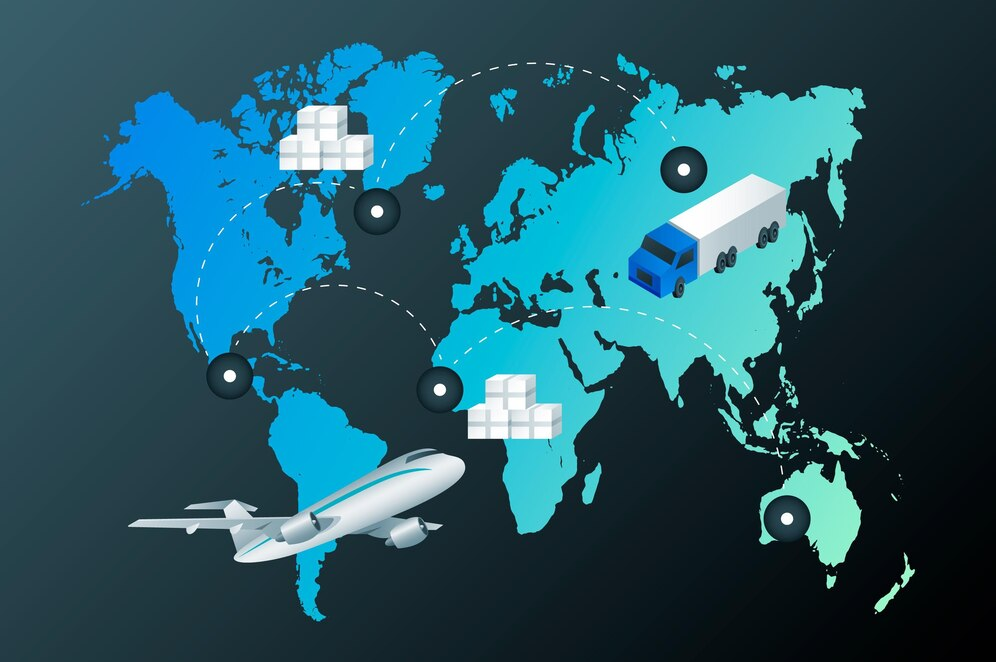

<hr>

- **Origem dos dados ou arquivos `CSV's` originais do projeto**

> Os dados foram extraídos do site **COMEX STAT** presentes no [link](https://comexstat.mdic.gov.br/pt/home) e salvos na pasta `csv original comex stat` desde projeto, os quais, o arquivo principal `IMP_2020.csv` e os auxiliares `NCM_SH.csv`, `PAIS.csv` e `VIA.csv`

- **Agradecimentos**

> Meus agradecimentos a **LUCIANA LANZONI MENGES** - `Administradora de Empresas com experiência em Comércio Exterior e Analista de BI`
>
> Autora de um artigo o qual inspirou este projeto de Analise de Dados. [Link_do_Artigo](https://harve.com.br/blog/data-science-blog/data-science-do-zero-analise-de-importacoes/)
> 
> [Linkedin - Luciana Lanzoni Menges](https://www.linkedin.com/in/luciana-lanzoni-menges/)

<hr>


# **Introdução**

<div style="text-align: justify; width: 80%; background-color:; line-height: 1.8; font-size: 18px">

<div align="justify">

Antes de tudo é importante falarmos um pouco sobre tamanhos de arquivos de dados, armazenar, tentar abrir ou analisar grandes conjuntos de dados `(Big Data)` é oneroso ou mesmo impossível se utilizado em computadores comuns devido à capacidade de armazenamento, processamento e memória. Por exemplo, trabalhar com arquivos `CSV` ou `XLSX` muito grandes ou que contenham milhares de linhas torna-se lento tanto na hora de abrir quanto na hora de salvar alterações. Outro simples detalhe é o fato de que se um CSV contiver mais de `1.048.576` linhas e for aberto no Excel, as linhas acima dessa quantidade não serão exibidas e analises nesses dados não serão válidas. Claro, também existe a possibilidade de abrir esses dados com Power BI, Python, entre outros, no entanto, este é um projeto que tem como foco principal a linguagem de programação `SQL` e `Cloud`, sendo assim, foram escolhidos alguns serviços na nuvem para essa tarefa.

Os fatores que influenciam a capacidade de processamento são diversos e podem influenciar a capacidade de processamento de um sistema, como a velocidade do processador, a quantidade de memória RAM disponível, a eficiência do sistema de refrigeração, entre outros. É importante que todos esses fatores sejam levados em consideração na hora de avaliar a capacidade de processamento de um sistema.

No entanto, a capacidade de armazenamento e processamento em serviços na nuvem é justificada, sendo que, esses sistemas geralmente são capazes de processar grandes volumes de dados e atender a múltiplos usuários simultaneamente, os serviços ou servidores na nuvem possuem processadores potentes com vários núcleos e com maior quantidade de memória RAM e clusterização, garantindo assim uma capacidade de processamento adequada.

Para este projeto o arquivo principal `IMP_2020.csv` com `127 megabytes` de tamanho possui quase dois milhões de linhas, isso nos permite ou nos direciona ao uso de um sistema capaz de processar esse arquivo, o sistema escolhido será a `Amazon Web Services` ou `AWS` que é uma plataforma de serviços de computação em nuvem mais abrangente e adotada no mundo. Alguns dos serviços oferecidos por ela são: Computação em nuvem; Armazenamento Banco de dados; Redes e entrega de conteúdo; Análises; Machine Learning; Segurança; identidade e conformidade, entre muitos outros.

Neste caso utilizaremos a `Amazon S3` que é um serviço de armazenamento de objetos (arquivos) que oferece escalabilidade, disponibilidade de dados, segurança e desempenho, nele será armazenado o arquivo `comex2020_enriched.csv` que criaremos posteriormente, no qual, a qualquer momento podemos recuperar qualquer volume de dados e em qualquer lugar na Web, desde que o lugar seja devidamente configurado, não apenas isso, usando esse serviço, podemos facilmente criar aplicações que fazem uso de armazenamento nativo em nuvem. Para saber mais acesse o link [Armazenamento de objetos na nuvem – Amazon S3](https://aws.amazon.com/pt/pm/serv-s3/) e para perguntas frequentes gerais acesse [Perguntas frequentes sobre a Amazon S3](https://aws.amazon.com/pt/s3/faqs/).

O Lugar na Web que iremos fazer as consultas e analises dos dados presentes na `Amazon S3` será outro serviço, a `Amazon Athena` que é um serviço de consultas interativas e que facilita a análise de dados usando `SQL` padrão para executar consultas `ad-hoc` e obter resultados em segundos e se necessário salvar esses resultados em novos arquivos csv menores para que possam ser trabalhados futuramente em diversas aplicações off-line e online, como Power Bi, Looker Studio, Excel, etc.

Antes de iniciarmos o projeto de analise em si, iremos realizar alguns tratamentos no arquivo principal `IMP_2020.csv` através da linguagem de programação `Python` e do `Visual Studio Code`, ao final será gerado um novo arquivo `comex2020_enriched.csv`, a partir da coluna mês desse arquivo criaremos novas partições dentro de uma pasta de nome `comex2020` com subpastas separadas por mês, pois, no momento de fazer as consultas através do `Athena` podemos especificar exatamente o período desejado, assim a consulta retornará apenas os dados que realmente buscamos não sendo necessário que a consulta leia todo o arquivo de dados, sendo que, a Amazon cobra pelo volume de dados lidos ou varridos na consulta. 

Atualmente o preço das consultas no Athena é de U$ 5,00 por TB de dados consultados e que são cumulativos no mês e cobrados posteriormente no cartão de crédito, como faremos consultadas extremamente pequenas e melhoradas no arquivo enriquecido o volume de dados será tão pequeno (bytes, kbytes, megabytes) que o custos serão centavos de dólar ou mesmo 0 centavos que serão faturados ao final do mês. Mais detalhes no link [Preços da Amazon Athena](https://aws.amazon.com/pt/athena/pricing/).

**Importante**: Vale lembrar que grande parte das etapas de um projeto de analise de dados esta relacionado ao tratamento dos dados `(ETL)` e a menor parte aos resultados.


</div>

<hr>


# **Objetivos gerais**

<div style="text-align: justify; width: 80%; background-color:; line-height: 1.8; font-size: 18px">

<div align="justify">

- Analisar dados de importação do comércio exterior brasileiro do ano de 2020

- Demonstrar habilidades básicas como `Analista de Dados` por meio das linguagens de programação `Python` e `SQL`, bibliotecas `pandas`, `pyarrow`, `seaborn` e `matplotlib`, `ETL`, conhecimentos em `Cloud Computing` ou `Amazon Web Services`, `Storytelling`, `Gráficos do Power BI` e `Gráficos do Seaborn`

- Entre outras...

</div>

<hr>

# **Visão geral da solução na AWS**

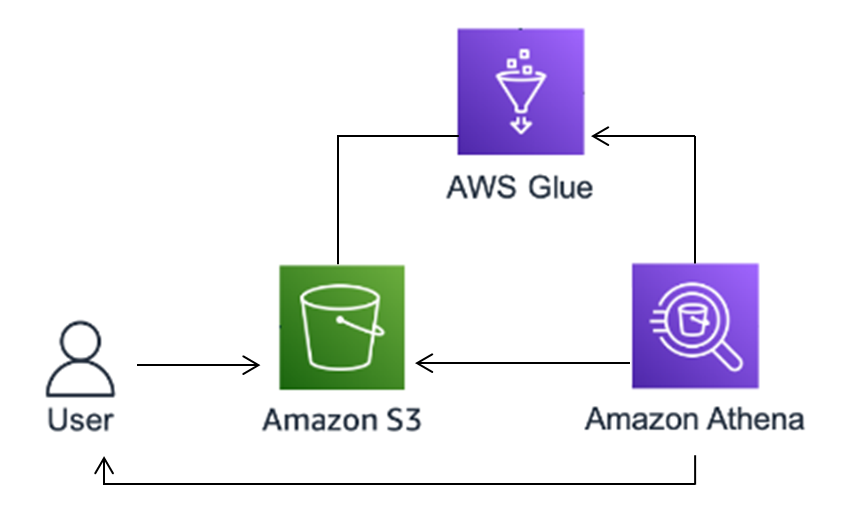

> O Usuário faz o upload de um arquivo para o `bucket` da `Amazon S3`
>
> A `AWS Glue` cataloga a localização, schema e estrutura dos dados
> 
> O catálogo com localização, schema e estrutura dos dados são criados a partir da criação das tabelas do `Athena` no próprio console do `Glue` ou direto via código no console do `Athena`
>
> As consultas do `Athena` acessam o `Glue` para verificar informações sobre os dados e só então acessam o bucket por meio de consultas SQL
>
> Os resultados são exibidos na tela ao usuário, caso o usuário necessite pode fazer o download dos resultados em CSV 
>
> **Observação:** Essa é uma aplicação simples, o S3 e Athena podem interagir com diversas ferramentas da própria AWS, API’s e serviços de terceiros, tanto no recebimento quanto no envio de dados

<hr>

# **Visão geral dos arquivos CSV e tabelas do projeto**

> Como mencionado anteriormente o arquivo principal será o `IMP_2020.csv` que possui as seguintes colunas conforme segue, em que a coluna principal é a `CO_NCM` (código_NCM) e contém um código de 8 dígitos. 
>
> Mais adiante esse arquivo será associado a uma tabela de nome `comex2020_parquet`

- **Amostra das colunas do arquivo IMP_2020.csv**

> 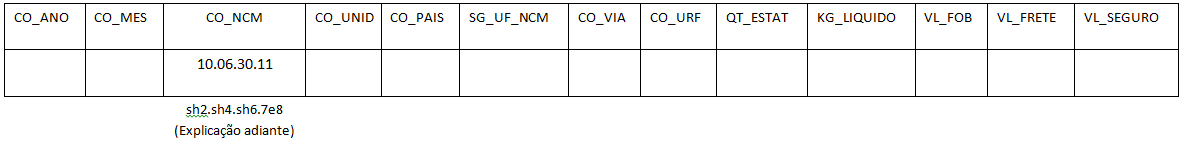
>
> A NCM ou Nomenclatura Comum do Comércio Exterior é um sistema ordenado que permite pela aplicação de regras e procedimentos próprios, determinar um único código numérico para uma dada mercadoria. 
>
> Esse código completo com seus 8 dígitos, uma vez conhecido, passa a representar a própria mercadoria.
>
> A NCM é uma Nomenclatura regional para categorização de mercadorias adotada pelo Brasil, Argentina, Paraguai e Uruguai desde 1995, sendo utilizada em todas as operações de comércio exterior dos países do Mercosul.
>
> A NCM toma por base o Sistema Harmonizado (SH), que é uma expressão condensada de “Sistema Harmonizado de Designação e de Codificação de Mercadorias”
>
> mantido pela Organização Mundial das Alfândegas (OMA), que foi criado para melhorar e facilitar o comércio internacional e seu controle estatístico. 
>
- **Veja a figura:**
>
> 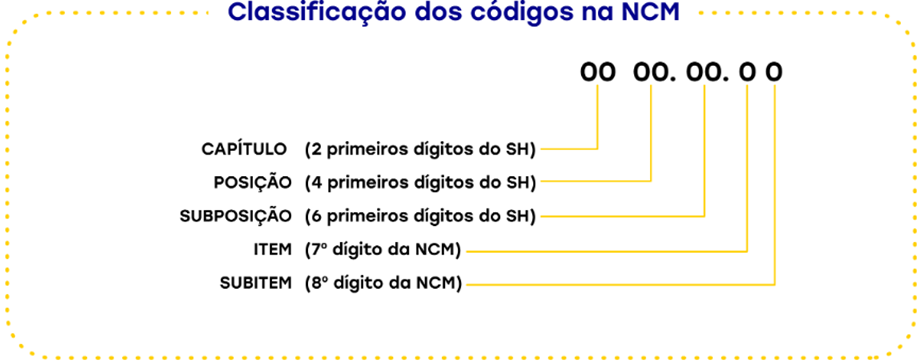
>
> **Fonte:** [Siscomex](https://www.gov.br/siscomex/pt-br/servicos/aprendendo-a-exportar/1-classificacao-fiscal-da-mercadoria/sh-e-ncm/sh-e-ncm/@@govbr.institucional.banner/de9f3542-ab50-4ec5-aaf0-801bae893f0a/@@images/a5fbafb0-c10f-42f9-be11-0159c17a4a01.png)
>
> - Os 2 primeiros dígitos SH2 representam o capítulo da categoria de produtos;
>
> - Os 4 primeiros SH4 representam a posição;
>
> - Os 6 primeiros SH6 representam a subposição;
>
> - O 7º dígito NCM representa o item do Mercosul e;
>
> - O 8º dígito NCM representa o subitem do Mercosul.
>	
> **Mais detalhes no site do** [Siscomex](https://www.gov.br/siscomex/pt-br/servicos/aprendendo-a-exportar/1-classificacao-fiscal-da-mercadoria/sh-e-ncm)


> A partir da coluna `CO_NCM` criaremos três novas colunas de nome `sh2`, `sh4`, `sh6`, cada uma separada com a respectiva quantidade de dígitos, então faremos consultas `SQL` por meio da utilização da cláusula `INNER JOIN` entre a tabela principal `comex2020_parquet` e a tabela `ncmsh` derivada do arquivo `NCM_SH.csv` que também possui as colunas separadas em partes de `6 dígitos (CO_SH6)`, `4 dígitos (CO_SH4)` e `2 dígitos (CO_SH2)`, porém a tabela `ncmsh` contém colunas com os nomes ou categorias referentes a cada posição dos dígitos. Veja tabela de exemplo:
>
> **Tabela `ncmsh`**
>
> 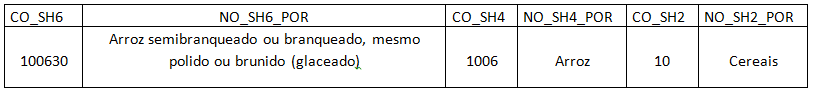
>
> **Por exemplo:**
>
> Na instrução `SQL` podemos informar ao `Athena` que queremos obter o nome ou categoria presente na coluna `NO_SH6_POR` da tabela `ncmsh`, no qual, 
>
> o código da coluna `sh6` da tabela `comex2020_parquet` seja igual ao código da coluna `CO_SH6` da tabela `ncmsh` e assim gerar alguns insights.
>
> - Os dois primeiros dígitos SH2 representam cereais;
>
> - Os quatro primeiros dígitos SH4 representam arroz;
>
> - Os seis primeiros dígitos SH6 representam arroz semibranqueado ou branqueado, mesmo polido ou brunido (glaceado);
>
> - O 7º dígito NCM representa arroz parabolizado (tabela comex2020_parquet);
>
> - O 8º dígito NCM representa arroz polido ou brunido (tebela comex2020_parquet).
> 
> **Nota:** Durante as consultas será possível entender melhor a explicação.

<hr>

<h1 id='menu'><b>Etapas do projeto</b><h1>

<a href="#etapaetl"><b>- 1ª Etapa - Tratamento dos dados `ETL`</b></a>

<a href="#criarconta"><b>- 2ª Etapa - Criar conta na `Amazon Web Services`</b></a>

<a href="#criarbuckets"><b>- 3ª Etapa - Criar os `buckets` na `Amazon S3`</b></a>

<a href="#criartabelas"><b>- 4ª Etapa - Criar as tabelas na `Amazon Athena`</b></a>

<a href="#consultas"><b>- 5ª Etapa - Consultas, analises e insights</b></a>

<a href="#conclusao"><b>- 6ª Etapa - Conclusão</b></a>

<hr>

<h1 id='etapaetl'><b>1ª Etapa - ETL</b> <button style="background-color:rgb(4, 66, 6); padding: 1px 5px; border: none; border-radius: 5px;"><a style="font-size: 15px; color: white;" href="#menu"><b>Voltar ao menu</b></a></button></h1>

- **Bibliotecas**

In [1]:
import pandas as pd                         # Dataframe
import warnings                             # Esconder erros de saída

- **Configurações básicas**

In [2]:
warnings.simplefilter('ignore', FutureWarning) # Esconder erros de saída

In [3]:
pd.set_option('display.max_columns', None) # Permitir visualização de todas as colunas

<hr>

## **Dataframe `imp_2020`**

- **Download do arquivo principal `IMP_2020.csv` no [link](https://balanca.economia.gov.br/balanca/bd/comexstat-bd/ncm/IMP_2020.csv)**

In [4]:
imp_2020 = pd.read_csv('csv original comex stat/IMP_2020.csv', sep=';')
imp_2020.head(2)

CO_ANO  CO_MES    CO_NCM  CO_UNID  CO_PAIS SG_UF_NCM  CO_VIA  CO_URF  \
0    2020       1  84669340       10      399        PR       4  917900   
1    2020       8  92099200       10      160        ES       4  817700   

   QT_ESTAT  KG_LIQUIDO  VL_FOB  VL_FRETE  VL_SEGURO  
0         1           1    2125        14          2  
1         6           6     976        51          0

In [5]:
imp_2020.shape # Total de linhas e colunas do arquivo original

(1784057, 13)

In [6]:
imp_2020.dtypes # Tipo de dados das colunas do arquivo original

CO_ANO         int64
CO_MES         int64
CO_NCM         int64
CO_UNID        int64
CO_PAIS        int64
SG_UF_NCM     object
CO_VIA         int64
CO_URF         int64
QT_ESTAT       int64
KG_LIQUIDO     int64
VL_FOB         int64
VL_FRETE       int64
VL_SEGURO      int64
dtype: object

In [7]:
imp_2020.isna().sum() # Confirmar se existem valores nulos na base de dados original, 0 igual a nenhum valor nulo, se houver precisam ser tratados

CO_ANO        0
CO_MES        0
CO_NCM        0
CO_UNID       0
CO_PAIS       0
SG_UF_NCM     0
CO_VIA        0
CO_URF        0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
VL_FRETE      0
VL_SEGURO     0
dtype: int64

- **Copiar partes da coluna `CO_NCM` e criar novas colunas com base nela**

In [8]:
imp_2020['NCM_SH6'] = imp_2020['CO_NCM'].astype(str).str[:-2]

In [9]:
imp_2020['NCM_SH4'] = imp_2020['CO_NCM'].astype(str).str[:-4]

In [10]:
imp_2020['NCM_SH2'] = imp_2020['CO_NCM'].astype(str).str[:-6]

In [11]:
imp_2020.head(2)

CO_ANO  CO_MES    CO_NCM  CO_UNID  CO_PAIS SG_UF_NCM  CO_VIA  CO_URF  \
0    2020       1  84669340       10      399        PR       4  917900   
1    2020       8  92099200       10      160        ES       4  817700   

   QT_ESTAT  KG_LIQUIDO  VL_FOB  VL_FRETE  VL_SEGURO NCM_SH6 NCM_SH4 NCM_SH2  
0         1           1    2125        14          2  846693    8466      84  
1         6           6     976        51          0  920992    9209      92

In [12]:
imp_2020.isna().sum() # Confirmar se existem valores nulos na base de dados após criar novas colunas, 0 igual a nenhum valor nulo

CO_ANO        0
CO_MES        0
CO_NCM        0
CO_UNID       0
CO_PAIS       0
SG_UF_NCM     0
CO_VIA        0
CO_URF        0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
VL_FRETE      0
VL_SEGURO     0
NCM_SH6       0
NCM_SH4       0
NCM_SH2       0
dtype: int64

<hr>

## **Dataframe `pais`**

> Nota: país cem acento agudo no i propositalmente

- **Download do arquivo `PAIS.csv` no [link](https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv)**

In [13]:
pais = pd.read_csv('csv original comex stat/PAIS.csv', sep=';', encoding='latin1')
pais.head(2)

CO_PAIS  CO_PAIS_ISON3 CO_PAIS_ISOA3       NO_PAIS  NO_PAIS_ING  \
0        0            898           ZZZ  Não Definido  Not defined   
1       13              4           AFG   Afeganistão  Afghanistan   

   NO_PAIS_ESP  
0  No definido  
1   Afganistan

In [14]:
pais.isna().sum() # Confirmar se existem valores nulos, 0 igual a nenhum valor nulo

CO_PAIS          0
CO_PAIS_ISON3    0
CO_PAIS_ISOA3    0
NO_PAIS          0
NO_PAIS_ING      0
NO_PAIS_ESP      0
dtype: int64

<hr>

## **Dataframe `via`**

- **Download do arquivo `VIA.csv` no [link](https://balanca.economia.gov.br/balanca/bd/tabelas/VIA.csv)**

In [15]:
via = pd.read_csv('csv original comex stat/via.csv', sep=';')
via.head(2)

CO_VIA             NO_VIA
0       0  VIA NAO DECLARADA
1       1           MARITIMA

In [16]:
pais.isna().sum() # Confirmar se existem valores nulos, 0 igual a nenhum valor nulo

CO_PAIS          0
CO_PAIS_ISON3    0
CO_PAIS_ISOA3    0
NO_PAIS          0
NO_PAIS_ING      0
NO_PAIS_ESP      0
dtype: int64

<hr>

## **Novo dataframe `df` a partir do `pd.merge`**

- **Unir dataframes `imp_2020`, `pais` e `via` com `pd.merge`**

In [17]:
df = pd.merge(imp_2020, pais, on='CO_PAIS')

df = pd.merge(df, via, on='CO_VIA')

df.head(2)

CO_ANO  CO_MES    CO_NCM  CO_UNID  CO_PAIS SG_UF_NCM  CO_VIA  CO_URF  \
0    2020       1  84669340       10      399        PR       4  917900   
1    2020       8  92099200       10      160        ES       4  817700   

   QT_ESTAT  KG_LIQUIDO  VL_FOB  VL_FRETE  VL_SEGURO NCM_SH6 NCM_SH4 NCM_SH2  \
0         1           1    2125        14          2  846693    8466      84   
1         6           6     976        51          0  920992    9209      92   

   CO_PAIS_ISON3 CO_PAIS_ISOA3 NO_PAIS NO_PAIS_ING NO_PAIS_ESP NO_VIA  
0            392           JPN   Japão       Japan       Japón  AEREA  
1            156           CHN   China       China       China  AEREA

<hr>

- **Index das colunas do novo dataframe**

In [18]:
for indice, nome in enumerate(df.columns):
    print(f"{indice} {nome}")

0 CO_ANO
1 CO_MES
2 CO_NCM
3 CO_UNID
4 CO_PAIS
5 SG_UF_NCM
6 CO_VIA
7 CO_URF
8 QT_ESTAT
9 KG_LIQUIDO
10 VL_FOB
11 VL_FRETE
12 VL_SEGURO
13 NCM_SH6
14 NCM_SH4
15 NCM_SH2
16 CO_PAIS_ISON3
17 CO_PAIS_ISOA3
18 NO_PAIS
19 NO_PAIS_ING
20 NO_PAIS_ESP
21 NO_VIA


<hr>

- **Selecionar apenas as colunas de interesse pelo `index` das colunas**

In [19]:
df = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,21]]

df.head(2)

CO_ANO  CO_MES    CO_NCM  CO_UNID  CO_PAIS SG_UF_NCM  CO_VIA  CO_URF  \
0    2020       1  84669340       10      399        PR       4  917900   
1    2020       8  92099200       10      160        ES       4  817700   

   QT_ESTAT  KG_LIQUIDO  VL_FOB  VL_FRETE  VL_SEGURO NCM_SH6 NCM_SH4 NCM_SH2  \
0         1           1    2125        14          2  846693    8466      84   
1         6           6     976        51          0  920992    9209      92   

  NO_PAIS NO_VIA  
0   Japão  AEREA  
1   China  AEREA

<hr>

- **Padrão de nomes para renomear colunas**
- **Usar o padrão de nomes das colunas abaixo como base para renomear as colunas de interesse final, basta apenas copiar tudo e adicionar o novo nome entre as aspas simples vazias, último nome presica ser ajustado com: `'` `:` `''` no final:'**

In [20]:
display("':'','".join(df.columns))

"CO_ANO':'','CO_MES':'','CO_NCM':'','CO_UNID':'','CO_PAIS':'','SG_UF_NCM':'','CO_VIA':'','CO_URF':'','QT_ESTAT':'','KG_LIQUIDO':'','VL_FOB':'','VL_FRETE':'','VL_SEGURO':'','NCM_SH6':'','NCM_SH4':'','NCM_SH2':'','NO_PAIS':'','NO_VIA"

- **Renomear colunas de interesse**

In [21]:

df.rename(columns={'CO_ANO':'ano','CO_MES':'mes','CO_NCM':'ncm','CO_UNID':'unid','CO_PAIS':'pais','SG_UF_NCM':'uf','CO_VIA':'via','CO_URF':'urf','QT_ESTAT':'estat','KG_LIQUIDO':'kg',
                   'VL_FOB':'fob','VL_FRETE':'frete','VL_SEGURO':'seguro','NCM_SH6':'sh6','NCM_SH4':'sh4','NCM_SH2':'sh2','NO_PAIS':'nome_pais','NO_VIA':'via_nome'}, inplace = True)

df.head(2)

ano  mes       ncm  unid  pais  uf  via     urf  estat  kg   fob  frete  \
0  2020    1  84669340    10   399  PR    4  917900      1   1  2125     14   
1  2020    8  92099200    10   160  ES    4  817700      6   6   976     51   

   seguro     sh6   sh4 sh2 nome_pais via_nome  
0       2  846693  8466  84     Japão    AEREA  
1       0  920992  9209  92     China    AEREA

<hr>

- **Schema atual do `df` renomeado**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784057 entries, 0 to 1784056
Data columns (total 18 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   ano        int64 
 1   mes        int64 
 2   ncm        int64 
 3   unid       int64 
 4   pais       int64 
 5   uf         object
 6   via        int64 
 7   urf        int64 
 8   estat      int64 
 9   kg         int64 
 10  fob        int64 
 11  frete      int64 
 12  seguro     int64 
 13  sh6        object
 14  sh4        object
 15  sh2        object
 16  nome_pais  object
 17  via_nome   object
dtypes: int64(12), object(6)
memory usage: 245.0+ MB


> **Nota:** O `df` continua com a mesma quantidade de linhas do arquivo original, e com colunas renomeadas, porém agora as colunas são do tipo objeto `sh6, sh4 e sh2` e precisam ser alteradas para `int64` 

<hr>

- **Converter novamente as colunas `sh6` `sh4` `sh2`**
> Converter novamente as colunas `sh6` `sh4` `sh2` de `object` para `int64` que será o mesmo `tipo` das mesmas colunas `CO_SH6, CO_SH4, CO_SH2` do arquivo `NCM_SH.csv` original, o qual este último será feito upload na `Amazon S3` para uso posterior com `inner join` em consultas no `Athena`
> 
> Na hora de fazer o `inner join` o ideal é que sejam do mesmo tipo para evitar erros em consultas

- **Confirmar os `tipos` das colunas do arquivo `NCM_SH.csv`**

In [23]:
ncm_sh = pd.read_csv('csv original comex stat/NCM_SH.csv', sep=';', encoding='latin1')

ncm_sh.dtypes

CO_SH6            int64
NO_SH6_POR       object
NO_SH6_ESP       object
NO_SH6_ING       object
CO_SH4            int64
NO_SH4_POR       object
NO_SH4_ESP       object
NO_SH4_ING       object
CO_SH2            int64
NO_SH2_POR       object
NO_SH2_ESP       object
NO_SH2_ING       object
CO_NCM_SECROM    object
NO_SEC_POR       object
NO_SEC_ESP       object
NO_SEC_ING       object
dtype: object

In [24]:
ncm_sh.isna().sum()

CO_SH6           0
NO_SH6_POR       0
NO_SH6_ESP       0
NO_SH6_ING       0
CO_SH4           0
NO_SH4_POR       0
NO_SH4_ESP       0
NO_SH4_ING       0
CO_SH2           0
NO_SH2_POR       0
NO_SH2_ESP       0
NO_SH2_ING       0
CO_NCM_SECROM    0
NO_SEC_POR       0
NO_SEC_ESP       0
NO_SEC_ING       0
dtype: int64

> **Nota:** Veja que as colunas `CO_SH6`, `CO_SH4`, `CO_SH4` do arquivo `NCM_SH.csv` são do tipo `int64`

- **Converter novamente as colunas `sh6` `sh4` `sh2` do Dataframe `imp_2020` para `int64` para coincidirem com as colunas do arquivo `NCM_SH.csv`**

In [25]:
df['sh6'] = df['sh6'].astype(int)

In [26]:
df['sh4'] = df['sh4'].astype(int)

In [27]:
df['sh2'] = df['sh2'].astype(int)

- **Schema do `df` final para confirmação**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784057 entries, 0 to 1784056
Data columns (total 18 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   ano        int64 
 1   mes        int64 
 2   ncm        int64 
 3   unid       int64 
 4   pais       int64 
 5   uf         object
 6   via        int64 
 7   urf        int64 
 8   estat      int64 
 9   kg         int64 
 10  fob        int64 
 11  frete      int64 
 12  seguro     int64 
 13  sh6        int64 
 14  sh4        int64 
 15  sh2        int64 
 16  nome_pais  object
 17  via_nome   object
dtypes: int64(15), object(3)
memory usage: 245.0+ MB


> **Nota:** 
> 
> As colunas `sh6` `sh4` `sh2` agora são do tipo int64
>
> O tamanho total do arquivo é de 245 MB 
>
> O Total de linhas se mantém o mesmo do Dataframe `imp_2020` inicial = 1784057
>
> O total de colunas que era de 13 agora é de 18 colunas


<hr>

## **Dataframe final enriquecido**

In [29]:
df.head()

ano  mes       ncm  unid  pais  uf  via      urf  estat    kg   fob  \
0  2020    1  84669340    10   399  PR    4   917900      1     1  2125   
1  2020    8  92099200    10   160  ES    4   817700      6     6   976   
2  2020    5  84339090    10   493  RS    1  1017700      8     8   239   
3  2020    4  85442000    10   275  PR    1   817800      6     6   502   
4  2020    1  72122090    10   351  SP    1   817800   2200  2200  7212   

   frete  seguro     sh6   sh4  sh2  nome_pais  via_nome  
0     14       2  846693  8466   84      Japão     AEREA  
1     51       0  920992  9209   92      China     AEREA  
2     11       0  843390  8433   84     México  MARITIMA  
3      1       0  854420  8544   85     França  MARITIMA  
4    240       0  721220  7212   72  Hong Kong  MARITIMA

<hr>

- **Particionamento da coluna mes com `pyarrow` documentação completa no [link](https://arrow.apache.org/docs/python/)**

In [30]:
import pyarrow
df.to_parquet('./comex2020', engine='pyarrow', compression='gzip', partition_cols='mes') # Criar pasta comex2020 particionada pela coluna mes

<hr>

- **Salvar CSV enriquecido**

In [31]:
df.to_csv('./comex2020_enriched.csv', sep=',', index=False) # Este CSV será feito upload para o bucket da Amazon S3

<hr>

<h1 id='criarconta'><b>2ª Etapa - Criar conta na Amazon Web Services</b> <button style="background-color:rgb(4, 66, 6); padding: 1px 5px; border: none; border-radius: 5px;"><a style="font-size: 15px; color: white;" href="#menu"><b>Voltar ao menu</b></a></button></h1>




- **Criar uma conta de nível gratuito na Amazon Web Services [link](https://www.googleadservices.com/pagead/aclk?sa=L&ai=DChcSEwjD54fUwbeMAxX1akgAHYvqAnUYABACGgJjZQ&ae=2&aspm=1&co=1&ase=5&gclid=Cj0KCQjwna6_BhCbARIsALId2Z3VBrpEN9AnoEwB_WQ0lEIGl21Lrkp7lQKxm8_4w13xh9QWVP4iUxwaAtAbEALw_wcB&ohost=www.google.com.br&cid=CAESV-D2a7mnFVrZmIFo1yC0f-R0hY0rWsrc1yTGwWAwweI6FFMeTFohy9SxCTIHm_4DPQN4btib54zOHQnxUwUksXlAuqsRprsdYKweMSaPVA56yfymCL-GPw&sig=AOD64_1dpo-hkG3cE1Jd6VRzssYIhIQWIA&q&adurl&ved=2ahUKEwiRsIHUwbeMAxXHDrkGHX6-NucQ0Qx6BAgOEAE)**


> Link saiba mais nível gratuito [AWS](https://aws.amazon.com/pt/free/?trk=c9dcfe7b-33fc-4345-b0c3-77b810bbd58c&sc_channel=ps&ef_id=Cj0KCQjwna6_BhCbARIsALId2Z3VBrpEN9AnoEwB_WQ0lEIGl21Lrkp7lQKxm8_4w13xh9QWVP4iUxwaAtAbEALw_wcB:G:s&s_kwcid=AL!4422!3!454435137321!p!!g!!aws%20account!10758390156!106168763036&gclid=Cj0KCQjwna6_BhCbARIsALId2Z3VBrpEN9AnoEwB_WQ0lEIGl21Lrkp7lQKxm8_4w13xh9QWVP4iUxwaAtAbEALw_wcB&all-free-tier.sort-by=item.additionalFields.SortRank&all-free-tier.sort-order=asc&awsf.Free%20Tier%20Types=*all&awsf.Free%20Tier%20Categories=*all#Learn_more_about_AWS_Free_Tier_Products)

> Preencha todos os passos e informe uma cartão de crédito ou débito quando solicitado

> Se preferir altere o menu para seu idioma preferido



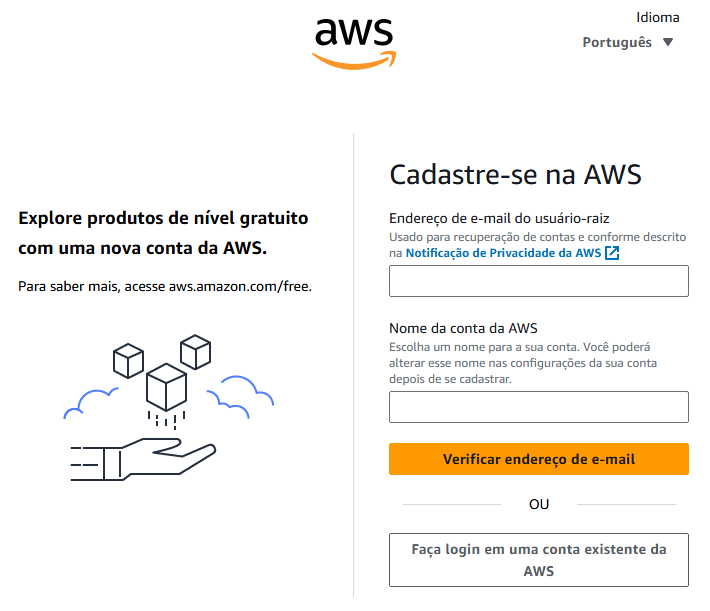

<hr>

<h1 id='criarbuckets'><b>3ª Etapa - Criar os buckets na Amazon S3</b> <button style="background-color:rgb(4, 66, 6); padding: 1px 5px; border: none; border-radius: 5px;"><a style="font-size: 15px; color: white;" href="#menu"><b>Voltar ao menu</b></a></button></h1>

> Após criada a conta faça login na AWS caso não esteja logado e procure pelo serviço `S3` na barra de buscas e clique sobre o serviço 

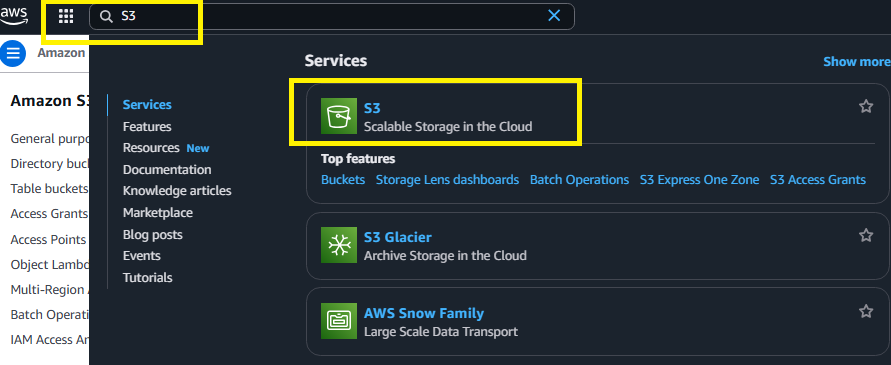

> Após acessar o S3 clique no menu `Create bucket` 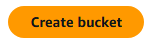

### **Criar bucket `comex2020`**

> Defina um nome para o bucket, pode ser igual o nome do arquivo enriquecido ou diferente
>
> Altere a região no canto superior direito para sua região, `importante`, sempre verifique se a região esta correta 
> 
> Deixe os demais itens marcados conforme a imagem e clique novamente em `Create bucket` no final da página
>
> Caso deseje aprender mais sobre os outros itens, clique em `Learn more` para saber mais

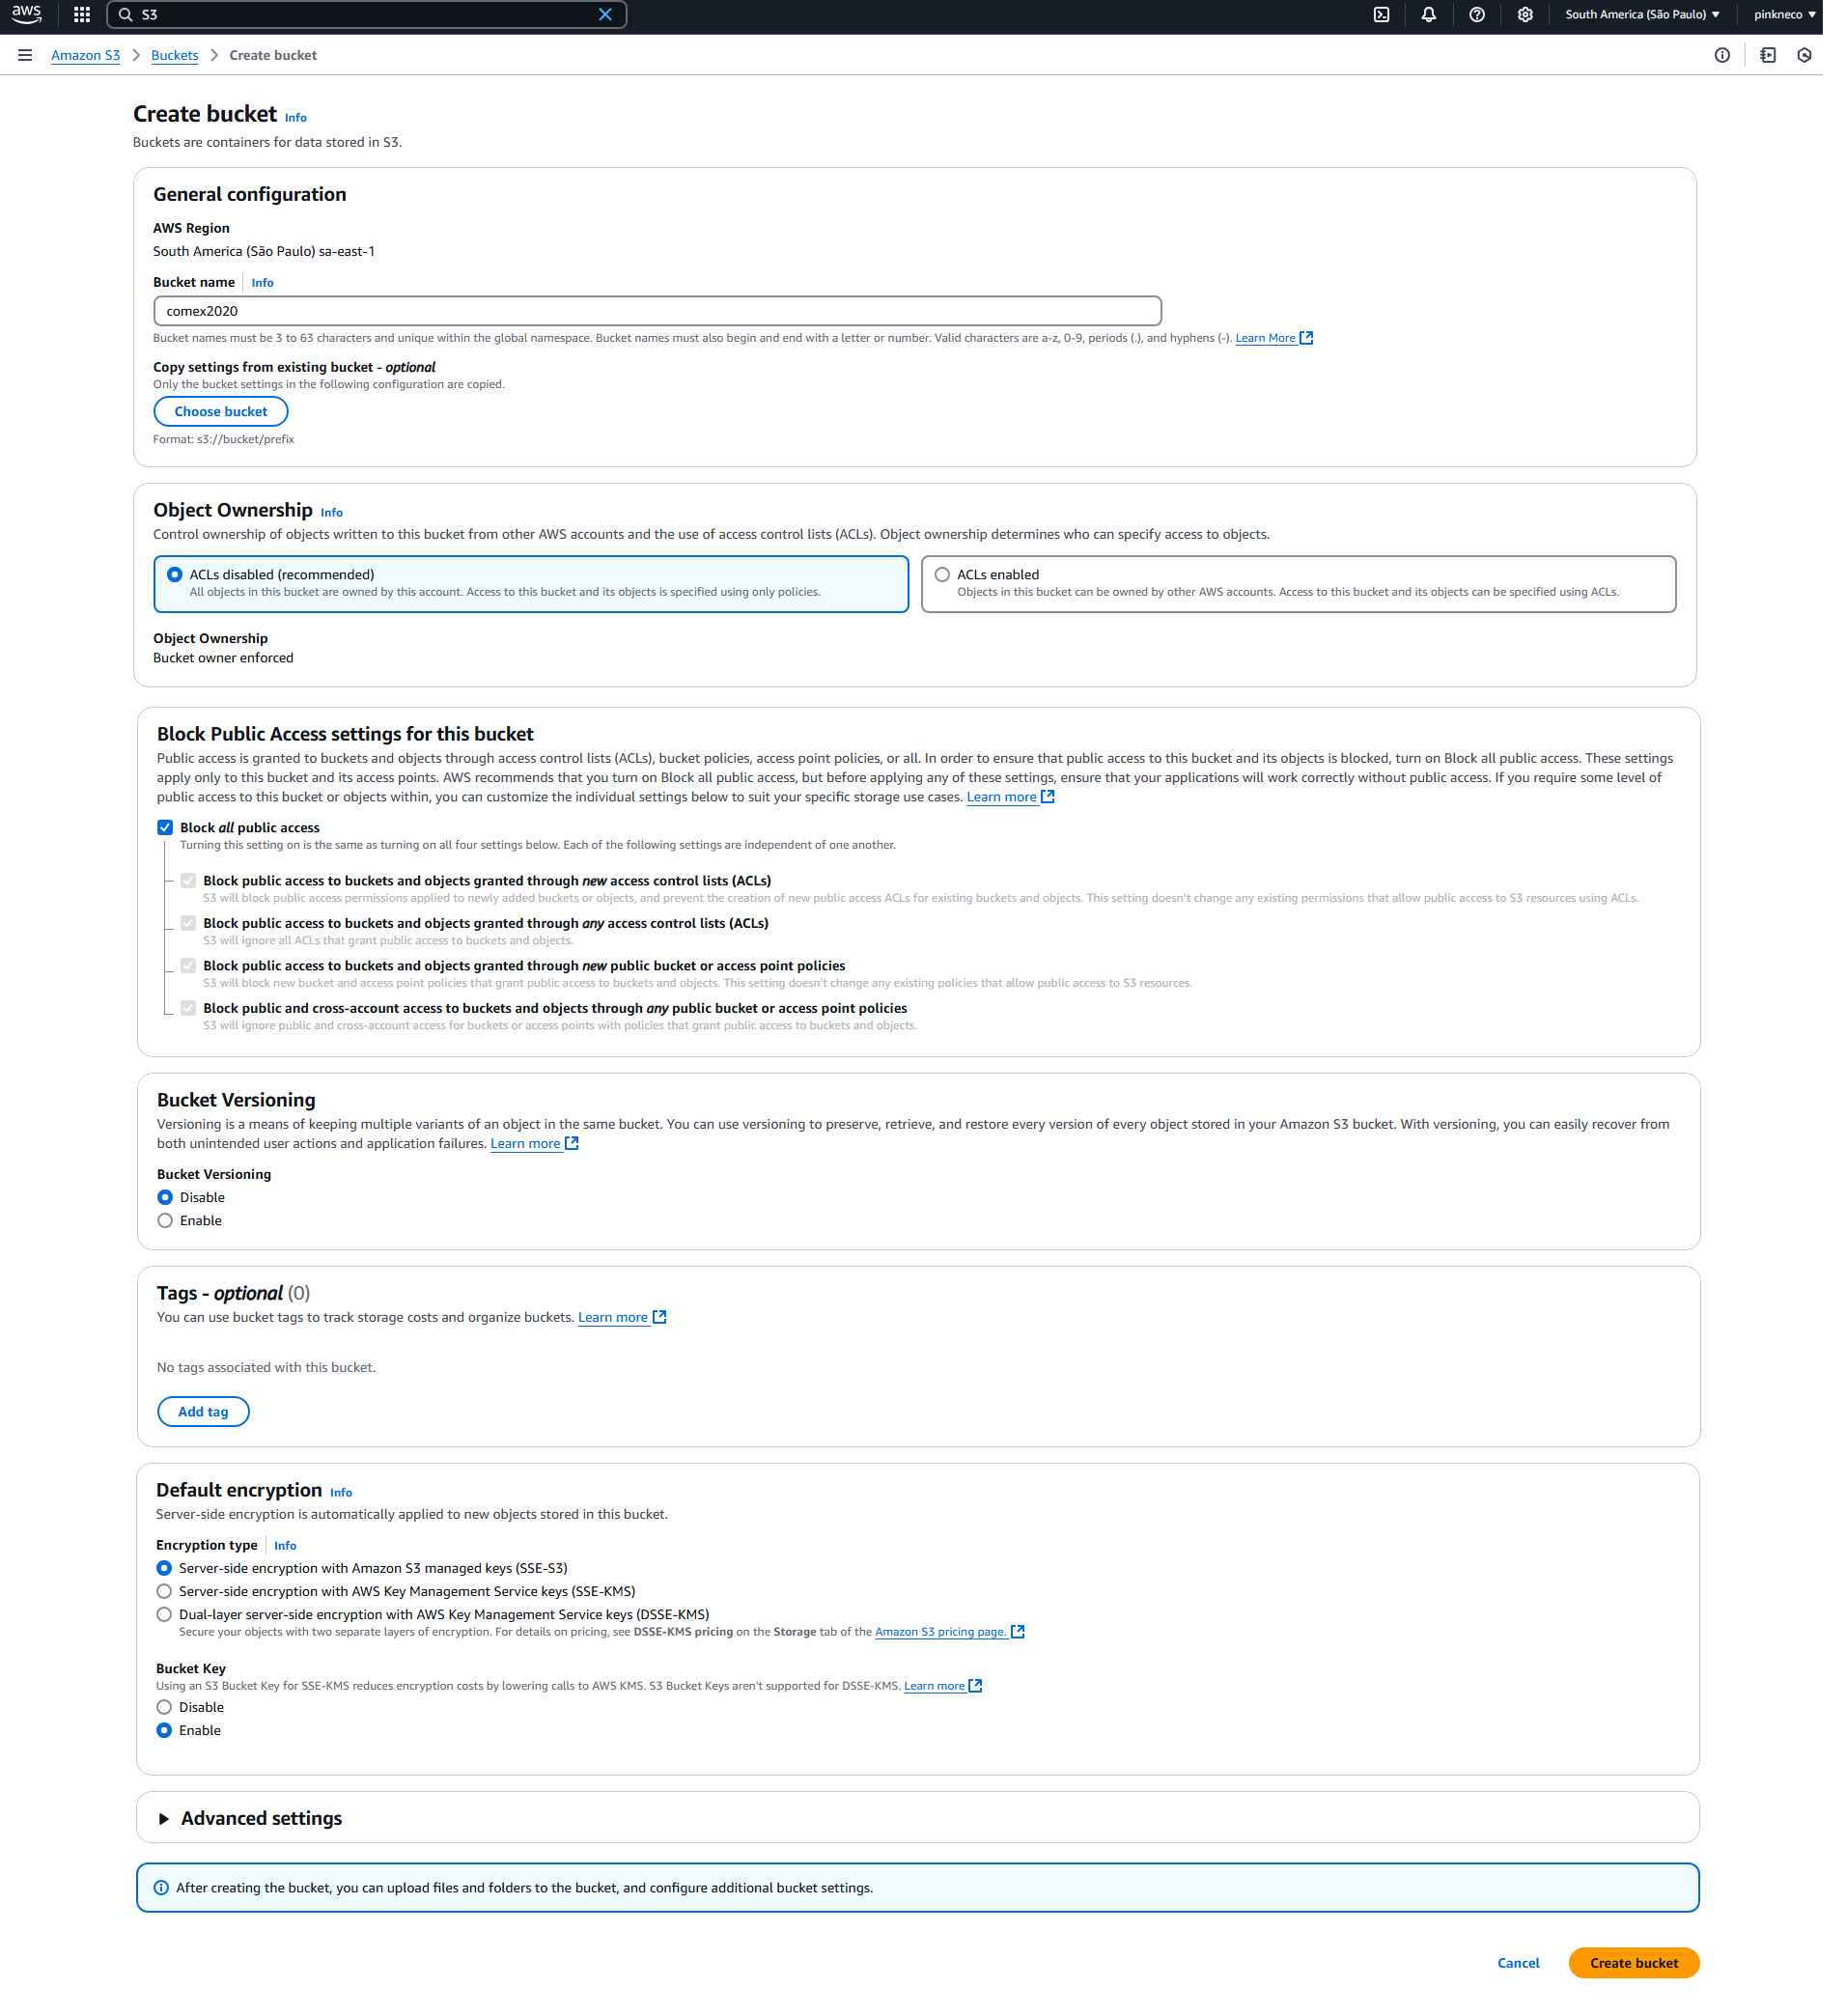

> Após criado o bucket `comex2020` ele já estará na lista de buckets, clique sobre ele e na próxima tela faça o upload do arquivo `comex2020_enriched.csv` para dentro desse bucket `comex2020`

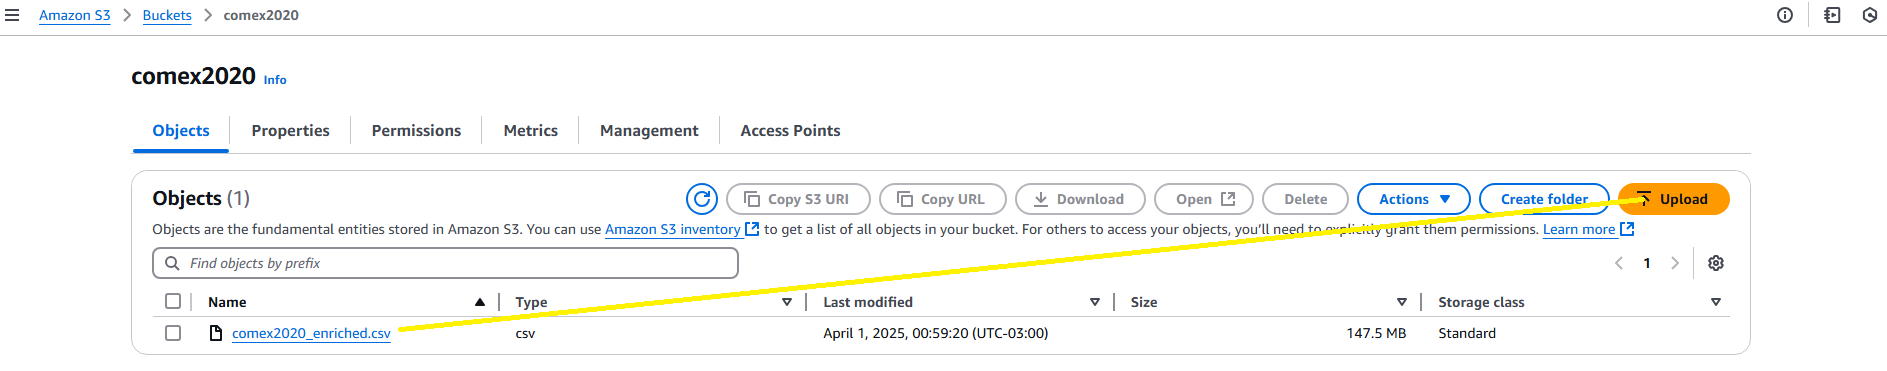

### **Criar bucket `comex2020-parquet`**

- **Siga exatamente os mesmos passos de criação do bucket anterior para criar um novo bucket**

> **Atenção:** Observe que foi utilizado `hífen` ou `traço` para criar o bucket `comex2020-parquet`
>
> **Parquet** é um formato em que os arquivos são organizados por colunas em vez de linhas, economizando espaço de armazenamento e acelerando as querys analíticas. Para saber mais sobre o formato acesse [databricks.com](https://www.databricks.com/br/glossary/what-is-parquet)  

> Criar o bucket `comex2020-parquet` e fazer o upload da pasta `comex2020` com os dados particionados pela coluna `mes` para dentro do bucket `comex2020-parquet`

> **Resultado do bucket `comex2020-parquet`:**

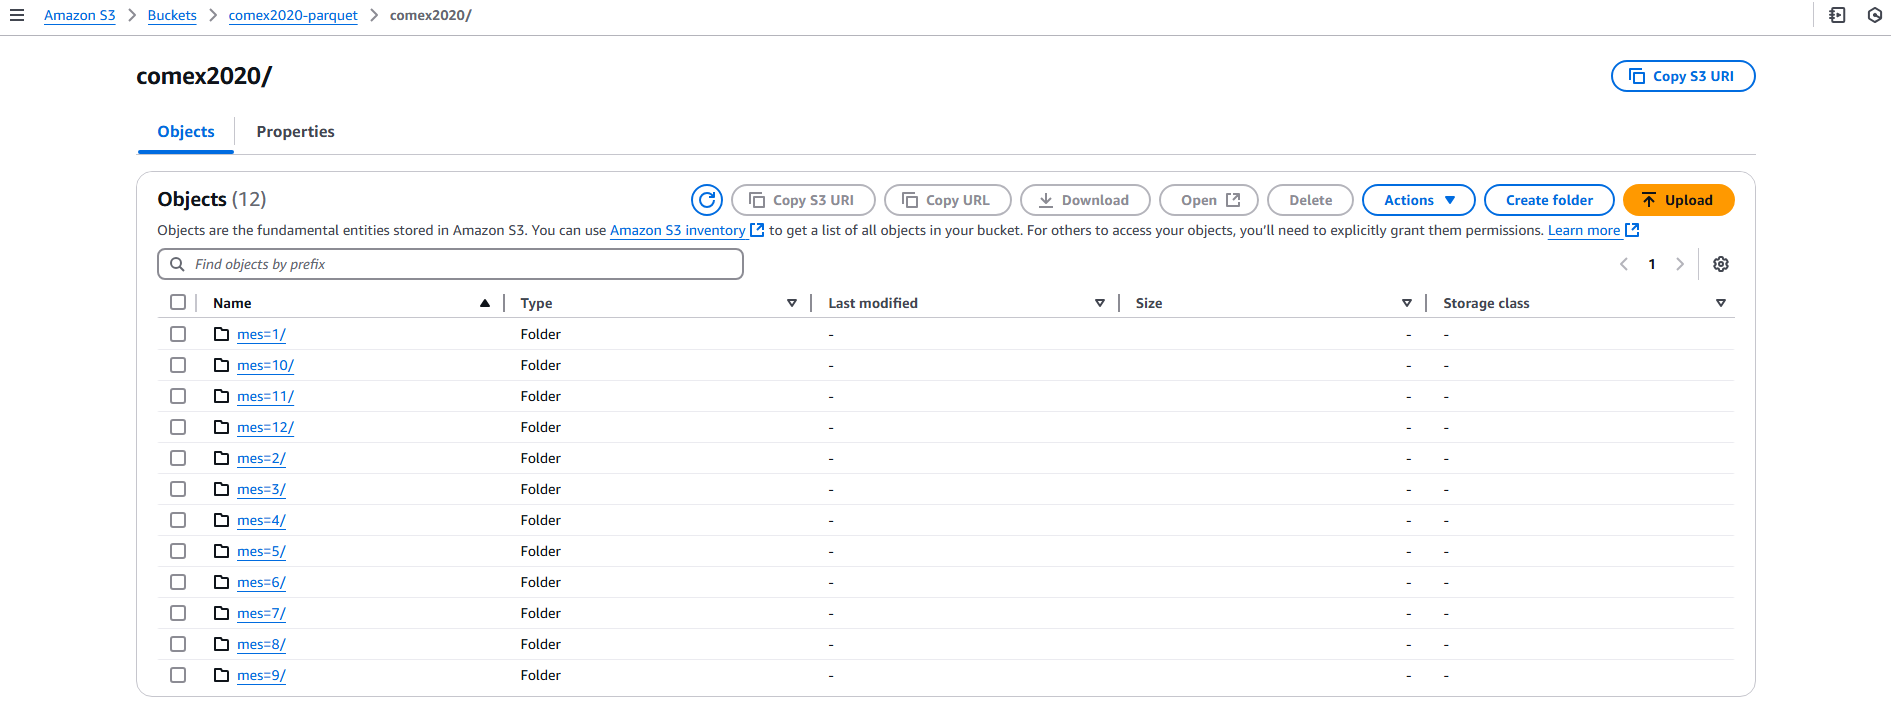

### **Criar bucket `ncmsh`**

- Crie o bucket `ncmsh` e faça o upload do arquivo `NCM_SH.csv` para dentro desse bucket. Link do arquivo [NCM_SH.csv](https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv)

> Faremos consultas entre a tabela `comex2020_parquet` e a tabela `ncmsh` através de `inner join` e gerar alguns insights




### **Criar um bucket `query-results-seunome` ou ``query-results-seuprojeto``**

> Siga os mesmos passos de criação dos buckets anteriores
>
> Esse buckut servirá de base de dados de logs/históricos de consultas de tudo o que fizermos no `Athena`   

<hr>

<h1 id='criartabelas'><b>4ª Etapa - Criar as tabelas na Amazon Athena</b> <button style="background-color:rgb(4, 66, 6); padding: 1px 5px; border: none; border-radius: 5px;"><a style="font-size: 15px; color: white;" href="#menu"><b>Voltar ao menu</b></a></button></h1>

- **Criação das tabelas no `Athena` para que interajam com os arquivos presentes nos `buckets` por meio de consultas SQL**
> Agora busque pelo serviço `Athena` e clique sobre ele

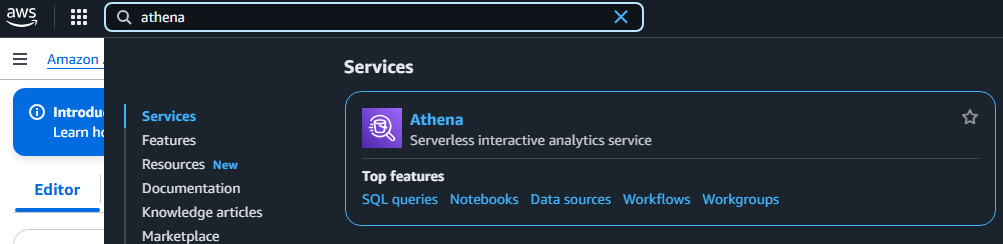

### **Configure o Athena para salvar logs/históricos no bucket `query-results-seunome`** 

> Clique na aba `Settings` > `Manage` e no campo `Location of query result` aponte para o bucket `query-results-seunome`
> 
> Clique em `Save` e pronto
>
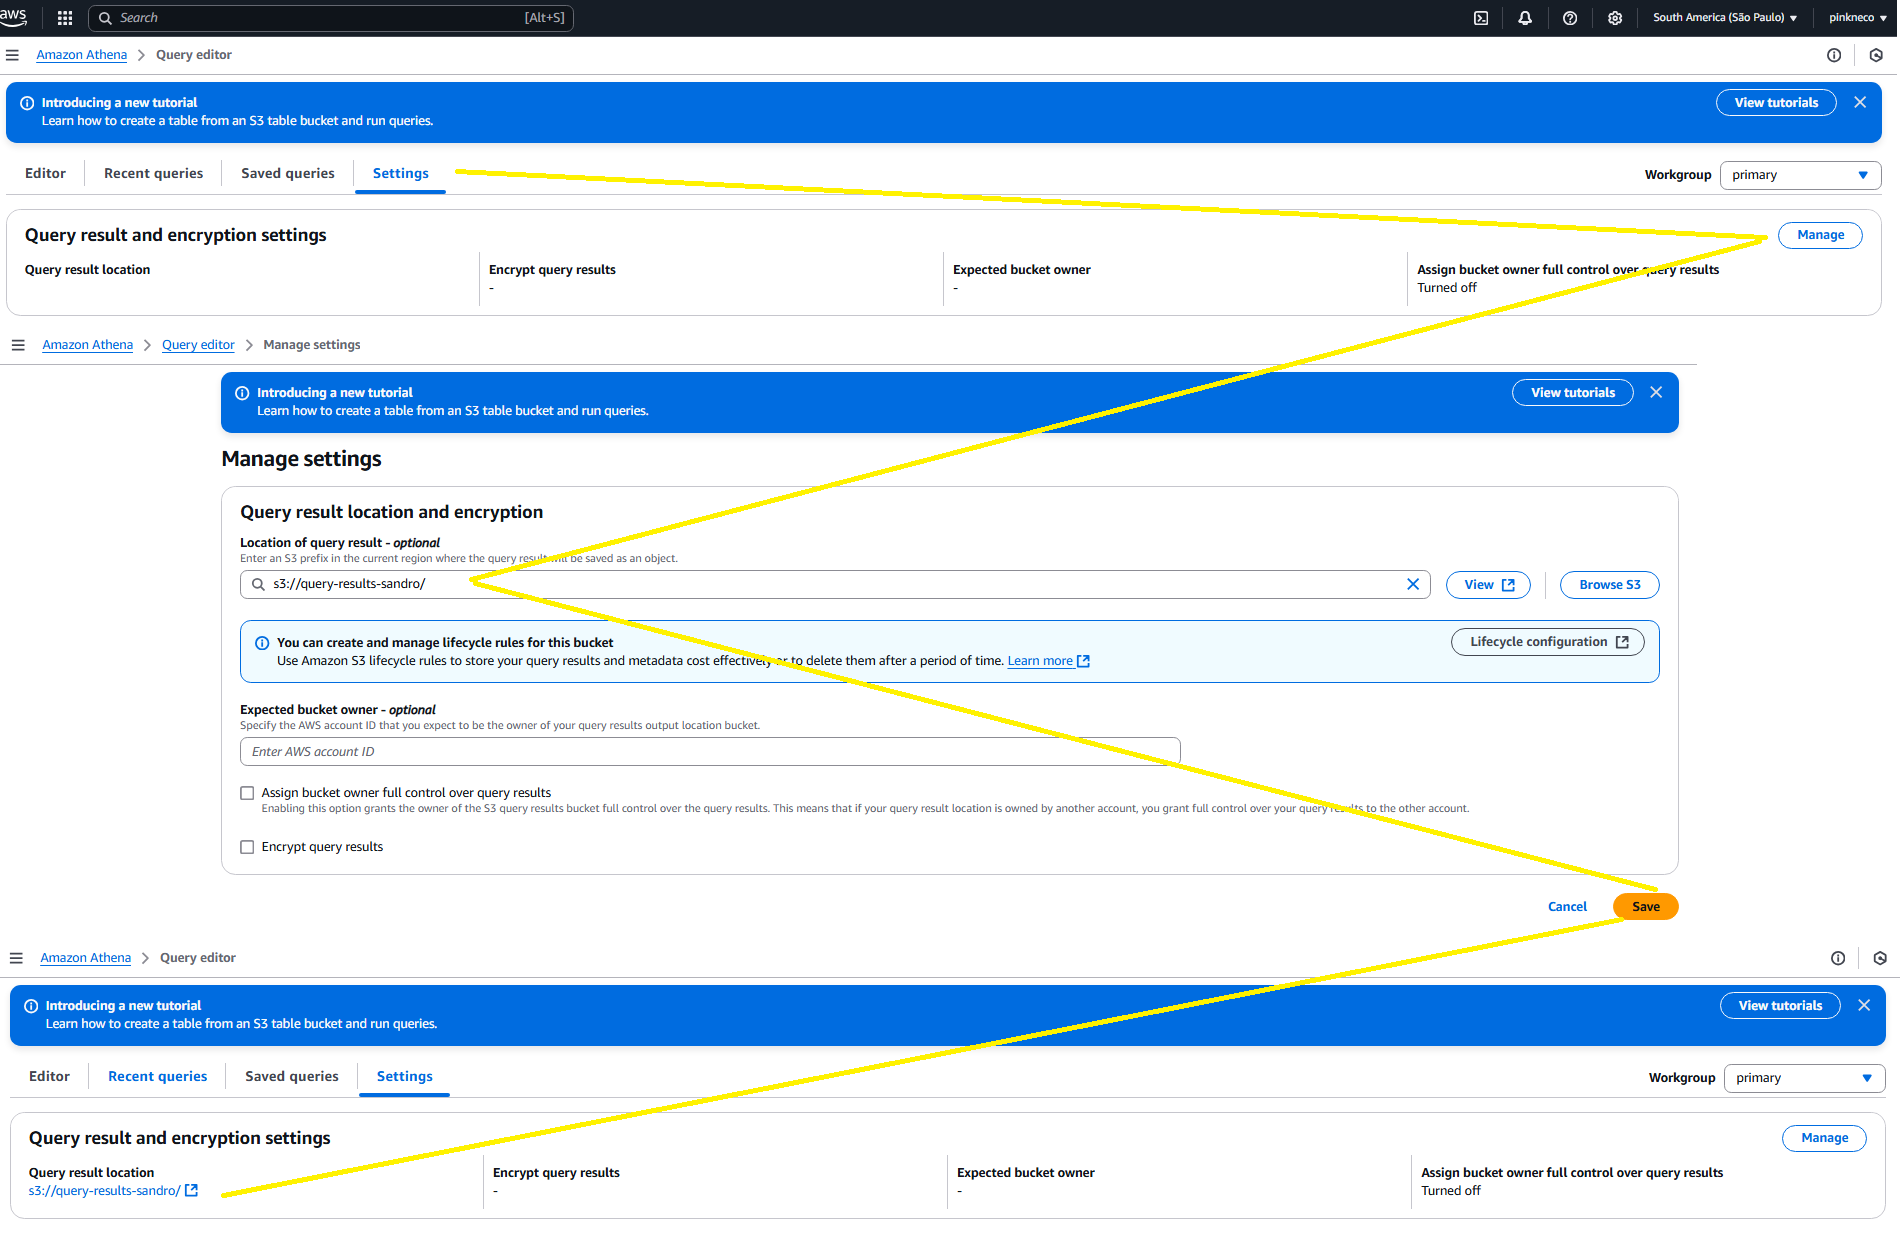


### **Criar tabela `comex2020`**

> Selecione a aba `Editor` e na janela de `Query` digite o código conforme a imagem abaixo ou copie o código que esta entre as três `aspas simples` que esta logo abaixo da imagem e cole na `Query`, após isso clique em 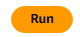 e a tabela `comex2020` será criada se o código estiver correto
>
> Detalhe importante, a quantidade de colunas deve ser a mesma do arquivo `comex2020_enriched.csv`
>
> Observe que a parte `LOCATION` do código aponta exatamente para o bucket `comex2020` criado anteriormente no `S3` que é onde está o arquivo `comex2020_enriched.csv`

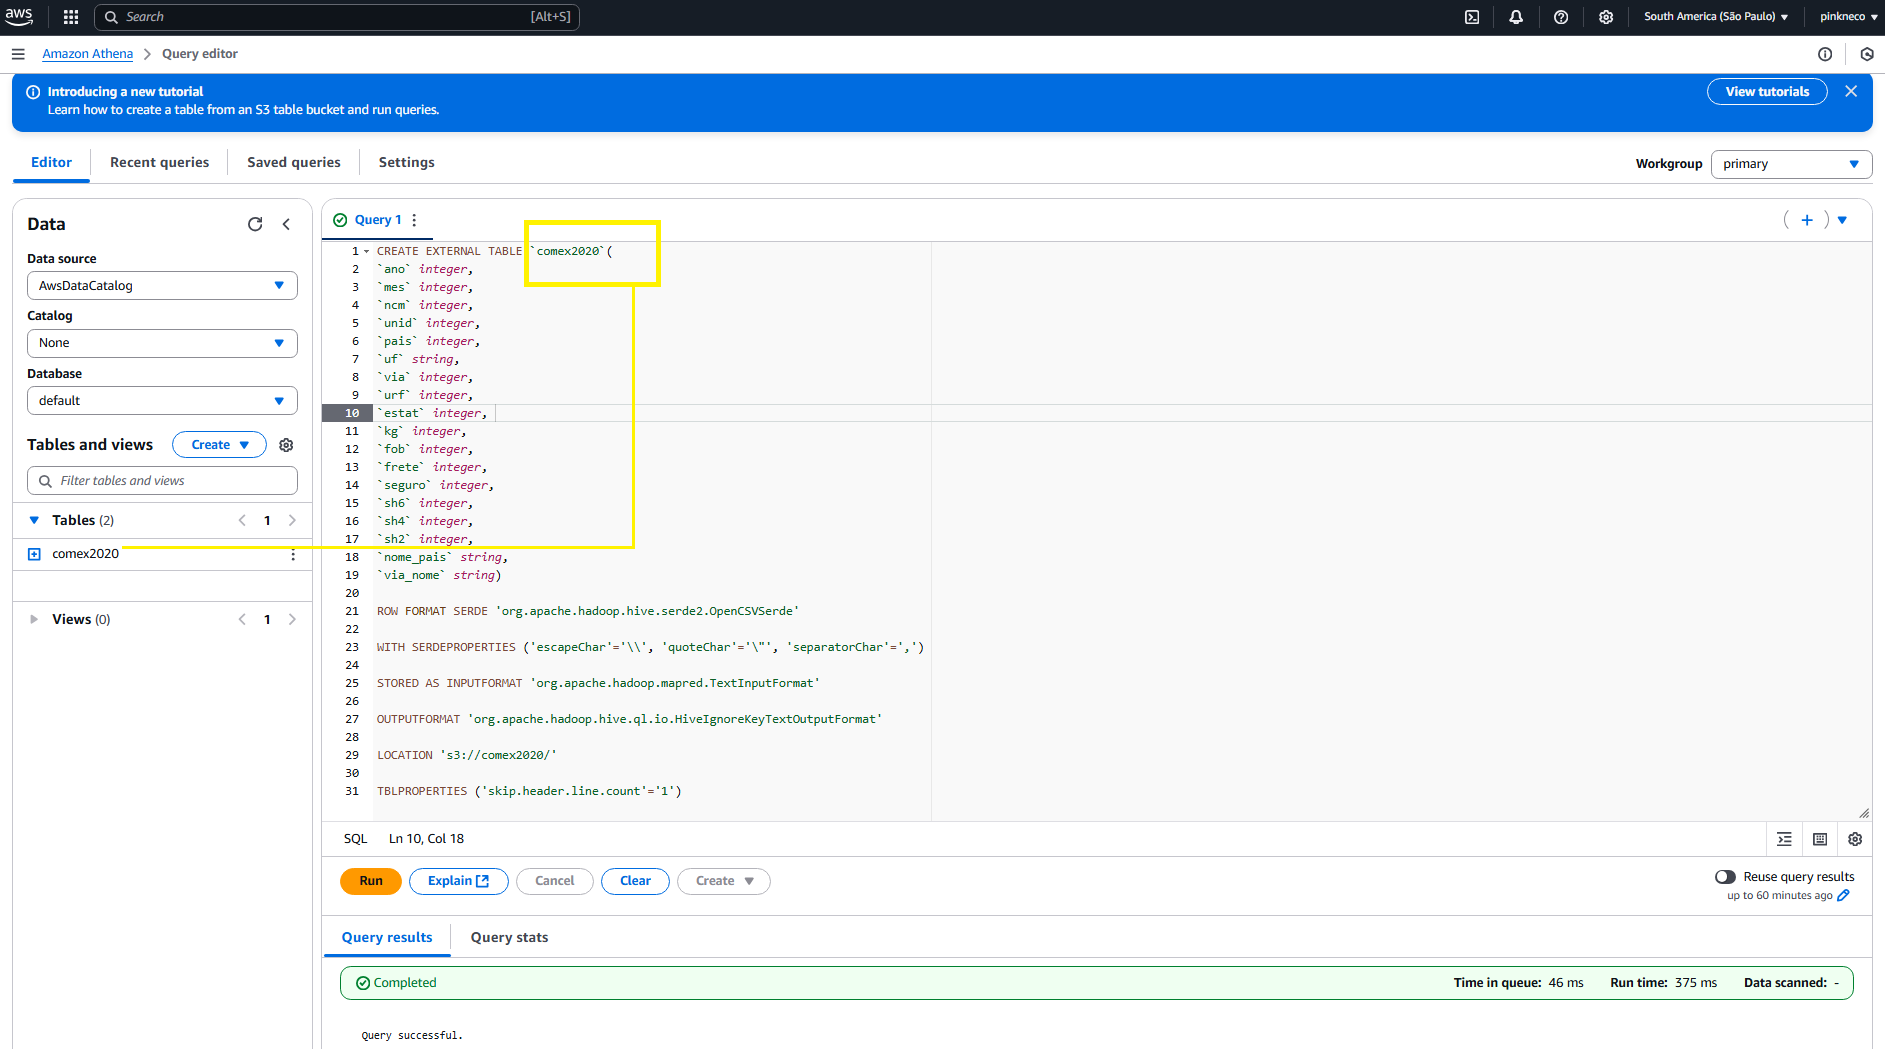

> Importante, sempre que for realizar uma consulta utilize a tabela `comex2020_parquet` que será criada após esta, assim a consulta irá fazer a leitura apenas dos dados que realmente buscamos e consumir apenas bytes, kbytes ou poucos megabytes de dados e o custo será menor ou mesmo zero
> 
> Caso contrário, se fizer a busca pela tabela `comex2020` a consulta ira fazer a leitura de toda a base de dados e isso poderá impactar no cumulativo do mês

In [ ]:
'''

CREATE EXTERNAL TABLE `comex2020`(
`ano` integer, 
`mes` integer, 
`ncm` integer, 
`unid` integer, 
`pais` integer, 
`uf` string, 
`via` integer, 
`urf` integer, 
`estat` integer, 
`kg` integer, 
`fob` integer, 
`frete` integer, 
`seguro` integer, 
`sh6` integer, 
`sh4` integer, 
`sh2` integer, 
`nome_pais` string, 
`via_nome` string)

ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde' 

WITH SERDEPROPERTIES ('escapeChar'='\\', 'quoteChar'='\"', 'separatorChar'=',') 

STORED AS INPUTFORMAT 'org.apache.hadoop.mapred.TextInputFormat' 

OUTPUTFORMAT 'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'

LOCATION 's3://comex2020/'

TBLPROPERTIES ('skip.header.line.count'='1')


'''

### **Criar tabela `comex2020_parquet`**

- **Agora siga exatamente os mesmos passos anteriores do `Athena` e crie a tabela `comex2020_parquet`, essa será a tabela particionada pela coluna `mes` e responsável pela leitura mínima de dados**

> **Atenção:** Observe que foi utilizado `underline` para criar o a tabela `comex2020_parquet`  
>
> Cópie ou digite o código abaixo em uma nova `Query` do Athena e clique em 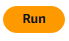
>
> Observe que a `LOCATION` aponta exatamente para o bucket `comex2020-parquet/comex2020` e sua subpasta comex2020

In [ ]:
'''

CREATE EXTERNAL TABLE `comex2020_parquet`(
  `ano` int, 
  `ncm` int, 
  `unid` int, 
  `pais` int, 
  `uf` string, 
  `via` int, 
  `urf` int, 
  `estat` int, 
  `kg` int, 
  `fob` int, 
  `frete` int, 
  `seguro` int, 
  `sh6` int, 
  `sh4` int, 
  `sh2` int, 
  `nome_pais` string, 
  `via_nome` string)
PARTITIONED BY ( 
  `mes` int)
ROW FORMAT SERDE 
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe' 
STORED AS INPUTFORMAT 
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat' 
OUTPUTFORMAT 
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://comex2020-parquet/comex2020'
  
  
  '''

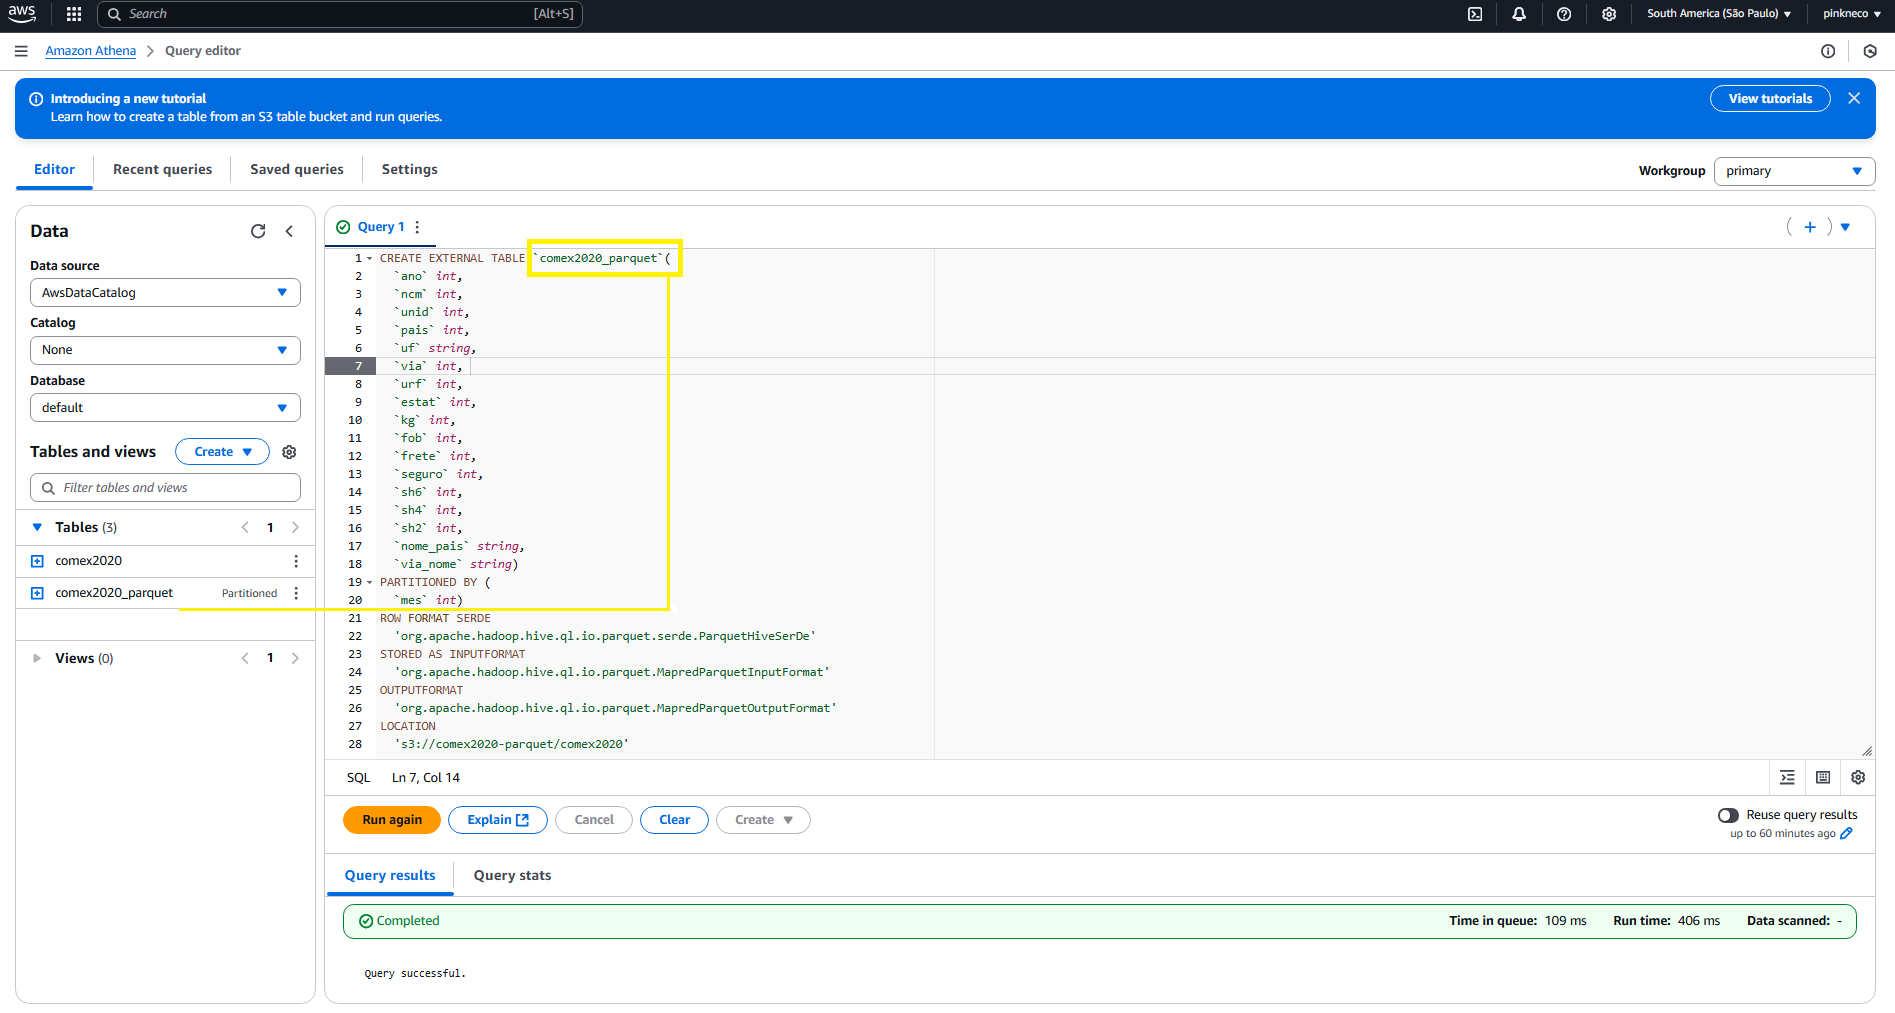

> Agorra é preciso carragar as partições presentes no bucket `comex2020-parquet` com um comando em uma nova `Query` do Athena, assim tudo estará pronto para consultas, analises e downloads dos resultados em um arquivo CSV se necessário

> **Comando:** `MSCK REPAIR TABLE comex2020_parquet`;

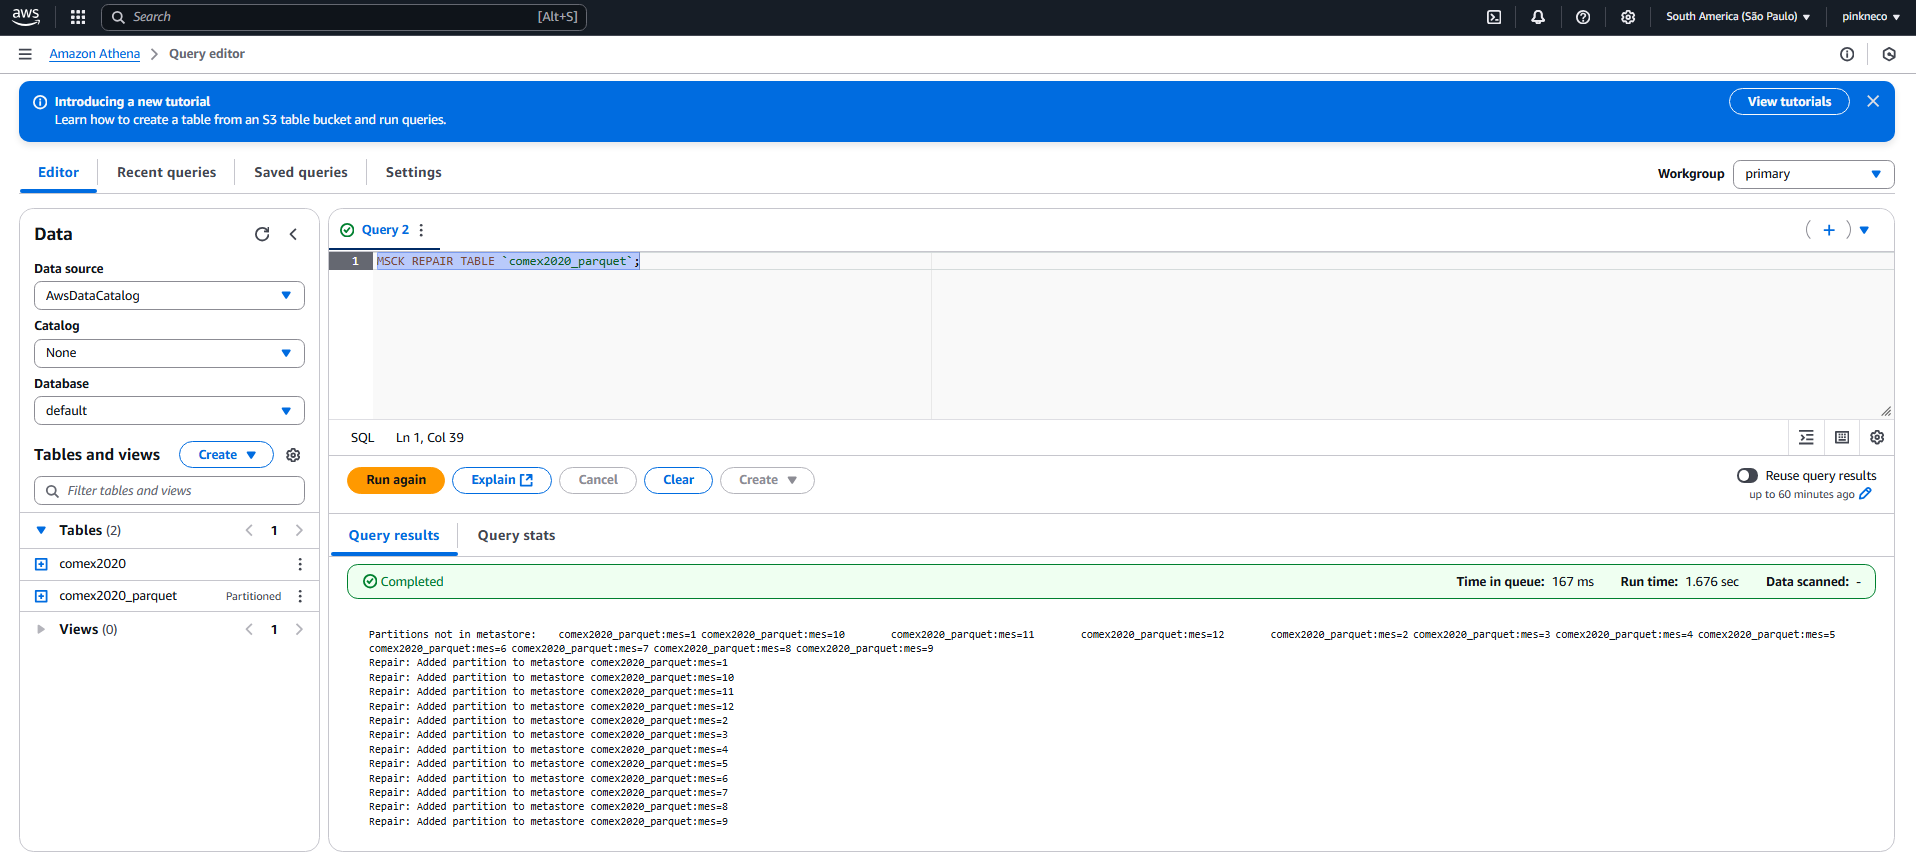

### **Criar tabela `ncmsh`**

> O código de criação da tabela esta logo abaixo da imagem entre as três `aspas simples`
> 
>Observe que a `LOCATION` no código aponta exatamente para o bucket `ncmsh` 
>
> Esta será a tebala que faremos o `inner join` com a tabela `comex2020_parquet`
>
> **Exemplo:** podemos fazer uma consulta com `inner join` entre a coluna `sh6` da tabela `comex2020_parquet` e a coluna `co_sh6` da tabela `ncmsh` e que contenham o mesmo valor numérico e pedir também que a consulta retorne o nome referente presente na coluna `no_sh6_por` da tabela `ncmsh`   

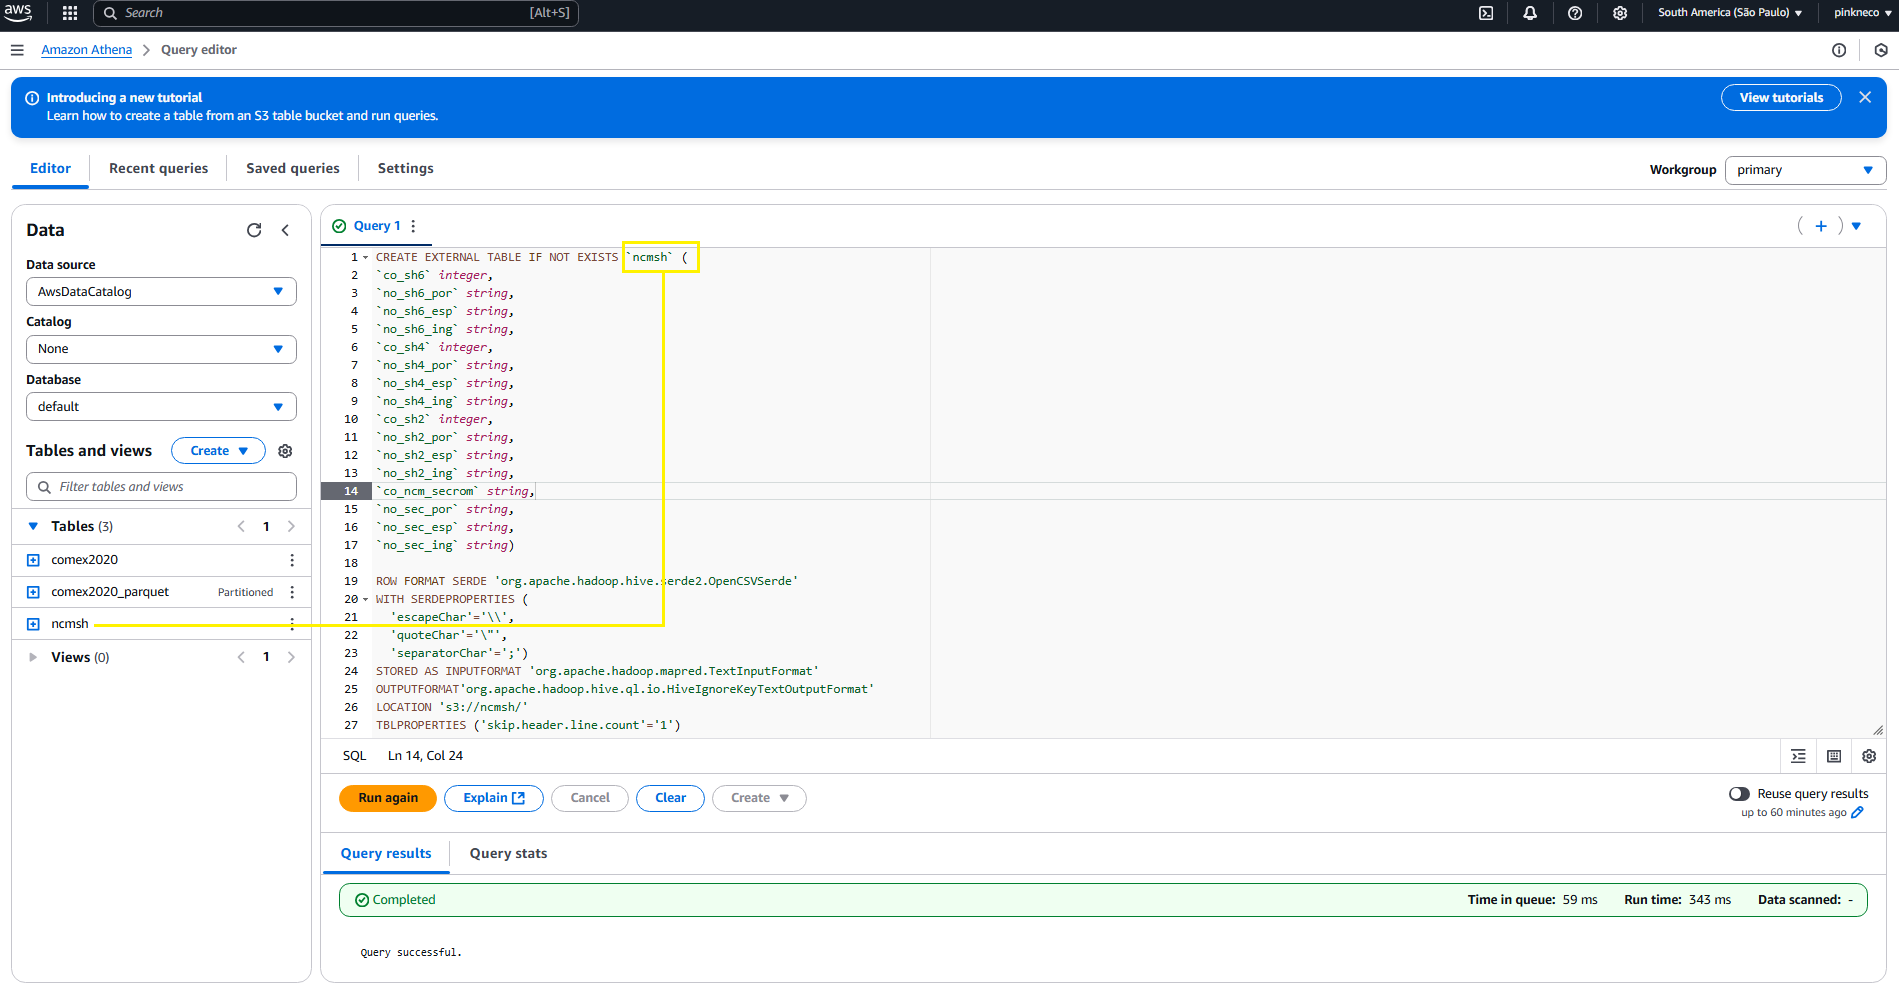

In [ ]:
'''


CREATE EXTERNAL TABLE IF NOT EXISTS `ncmsh` (
`co_sh6` integer,
`no_sh6_por` string,
`no_sh6_esp` string,
`no_sh6_ing` string,
`co_sh4` integer,
`no_sh4_por` string,
`no_sh4_esp` string,
`no_sh4_ing` string,
`co_sh2` integer,
`no_sh2_por` string,
`no_sh2_esp` string,
`no_sh2_ing` string,
`co_ncm_secrom` string,
`no_sec_por` string,
`no_sec_esp` string,
`no_sec_ing` string)

ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde' 
WITH SERDEPROPERTIES ( 
  'escapeChar'='\\', 
  'quoteChar'='\"', 
  'separatorChar'=';') 
STORED AS INPUTFORMAT 'org.apache.hadoop.mapred.TextInputFormat' 
OUTPUTFORMAT'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'
LOCATION 's3://ncmsh/'
TBLPROPERTIES ('skip.header.line.count'='1')


'''

<hr>

<h1 id='consultas'><b>5ª Etapa - Consultas, analises e insights</b> <button style="background-color:rgb(4, 66, 6); padding: 1px 5px; border: none; border-radius: 5px;"><a style="font-size: 15px; color: white;" href="#menu"><b>Voltar ao menu</b></a></button></h1>

- **1ª Consulta**  
> 
> Consulta dos seis primeiros dígitos `NCM(100630)` da coluna de Subposição `sh6` da tabela `comex2020_parquet` para que retorne o nome referente que consta na coluna de Subposição `no_sh6_por` da tabela `ncmsh`.
> 
> A consulta deve retornar a importação de `(Arroz semibranqueado ou branqueado, mesmo polido ou brunido (glaceado))` pelo estado de `São Paulo` para cada mês do ano de 2020 e seu `total fob` em dólares por mês.

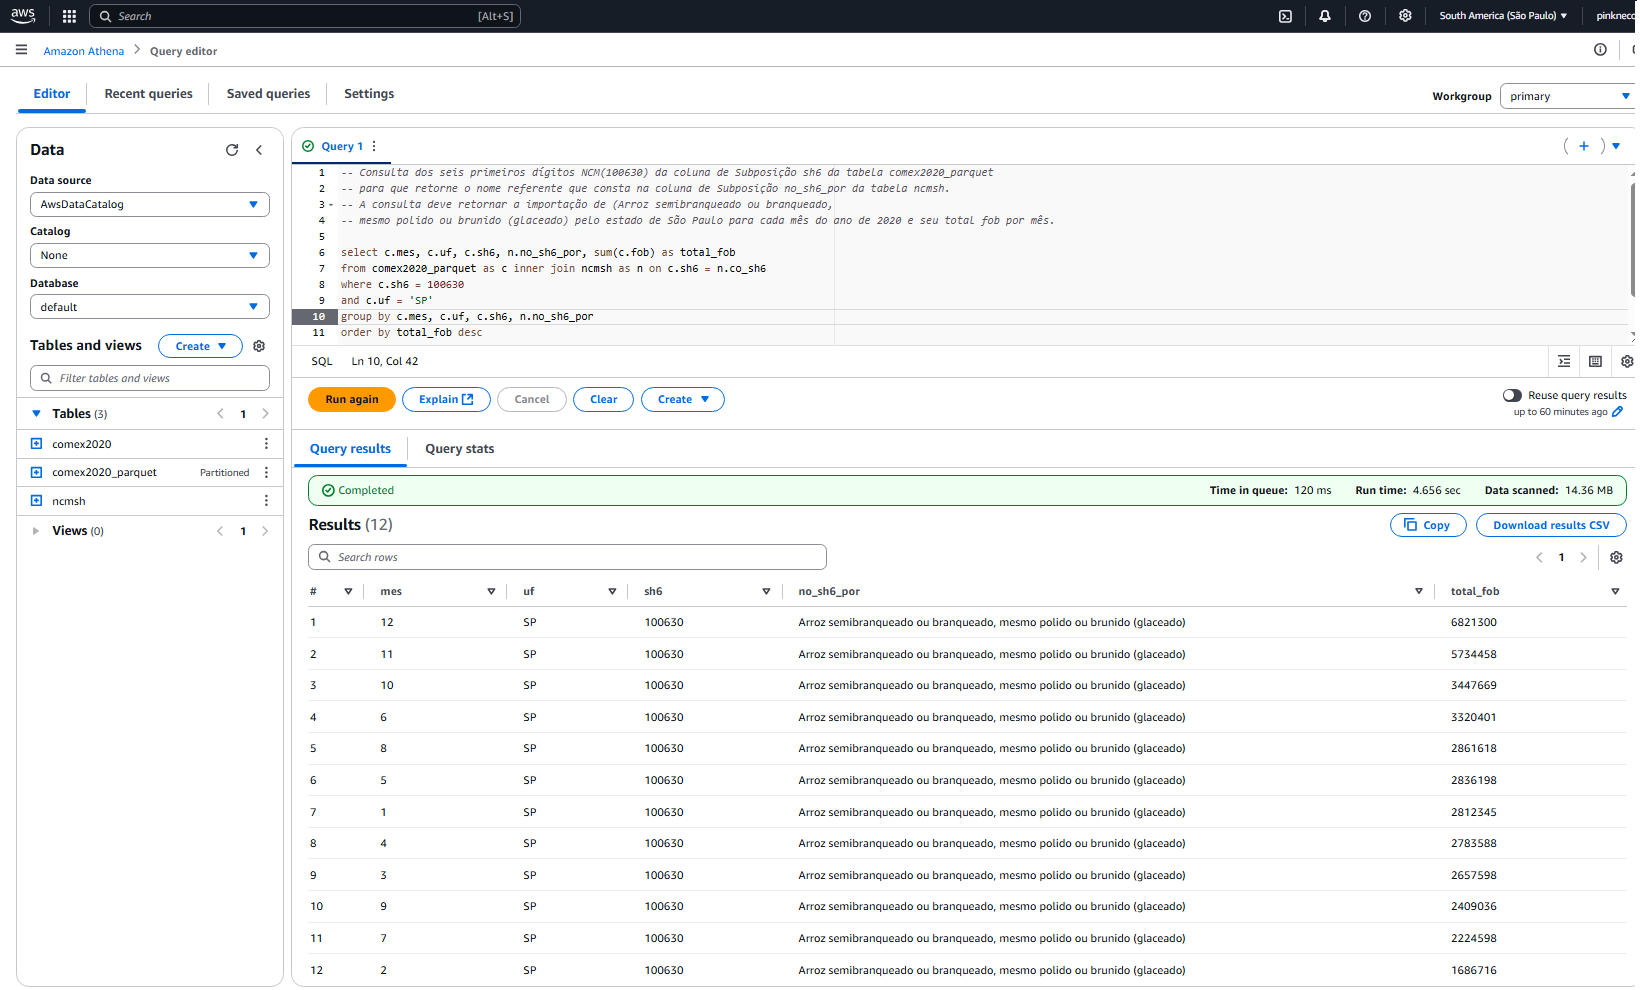

> **Nota:** Observe na imagem da consulta que o tempo na fila `(Time in queue)` antes da execução foi 120 milissegundos, tempo de execução `(Run time)` foi de 4.656 segundos e dados escaneados `(Data scanned)` foi 14.36 MB, esses valores podem ser menores dependendo da configuração das tabelas e das instruções SQL dependendo da necessidade, quanto menos dados forem lidos, menor será o valor faturado pela Amazon no final do mês, podendo ser até mesmo zero.
>
> Para este projeto o arquivo `NCN_SH.csv` não foi particionado, por isso o dados escaneados foram um pouco maiores, pois a consulta leu todo o arquivo `NCN_SH.csv` que tem por volta de 7.30 MB, caso ache necessário você poderá particionar esse arquivo para que a leitura seja menor e mais rápida. Se fizer uma consulta de um determinado `NCM` apenas na tabela `comex2020_parquet` verá que os dados escaneados serão apenas `Kbytes`.

- **Gráfivo de barras do POWER BI - 1ª Consulta**

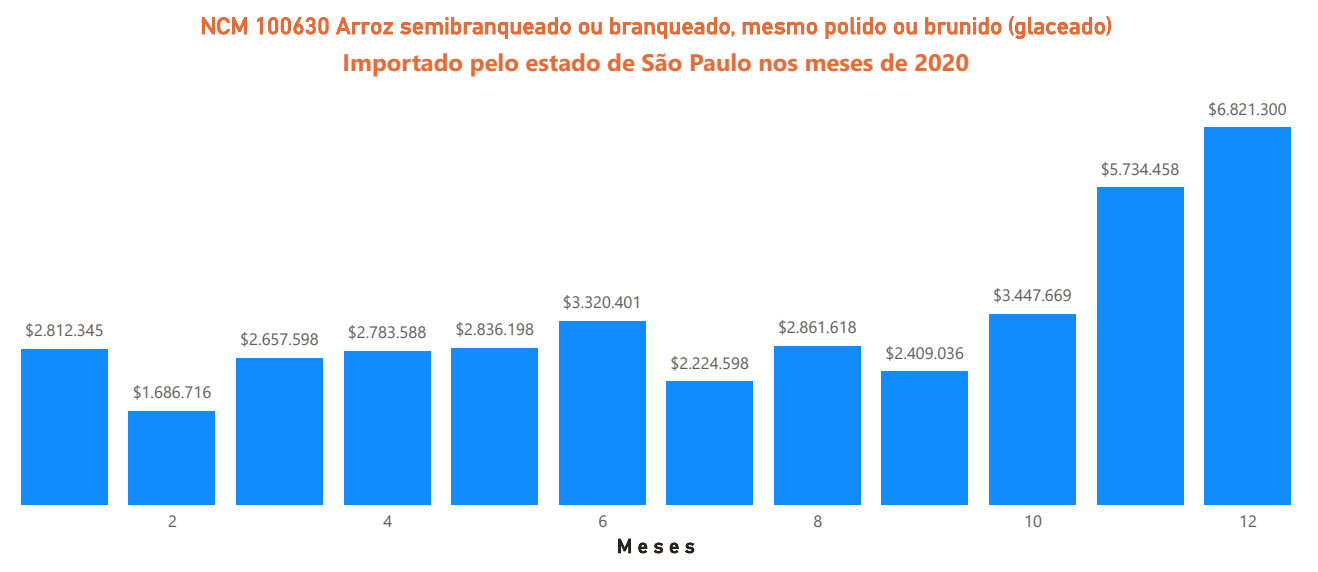

**Fonte:** A partir do Download em `CSV`dos resultados da 1ª Consulta no Athena, renomeado para `Arroz NCM 100630 SP 2020.csv` presente na pasta `csv original consultas athena`

- **Gráfivo de barras em `Python` e as bibliotecas `Seaborn` e `matplotlib` - 1ª Consulta**

In [35]:
import pandas as pd

ncm_100630 = pd.read_csv('csv original consultas athena/Arroz NCM 100630 SP 2020.csv', sep=',')

ncm_100630.head(13)

mes  uf     sh6                                         no_sh6_por  \
0    12  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
1    11  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
2    10  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
3     6  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
4     8  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
5     5  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
6     1  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
7     4  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
8     3  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
9     9  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
10    7  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   
11    2  SP  100630  Arroz semibranqueado ou branqueado, mesmo poli...   

    total_fob  
0     6821300  
1     5734458  
2     3447669  
3     3320401  
4     2861618  
5     2836198  
6     2812345  
7     2783588  
8     2657598  
9     2409036  
10    2224598  
11    1686716

Fonte: A partir do Download em `CSV`dos resultados da 1ª Consulta no Athena, renomeado para `Arroz NCM 100630 SP 2020.csv` presente na pasta `csv original consultas athena`


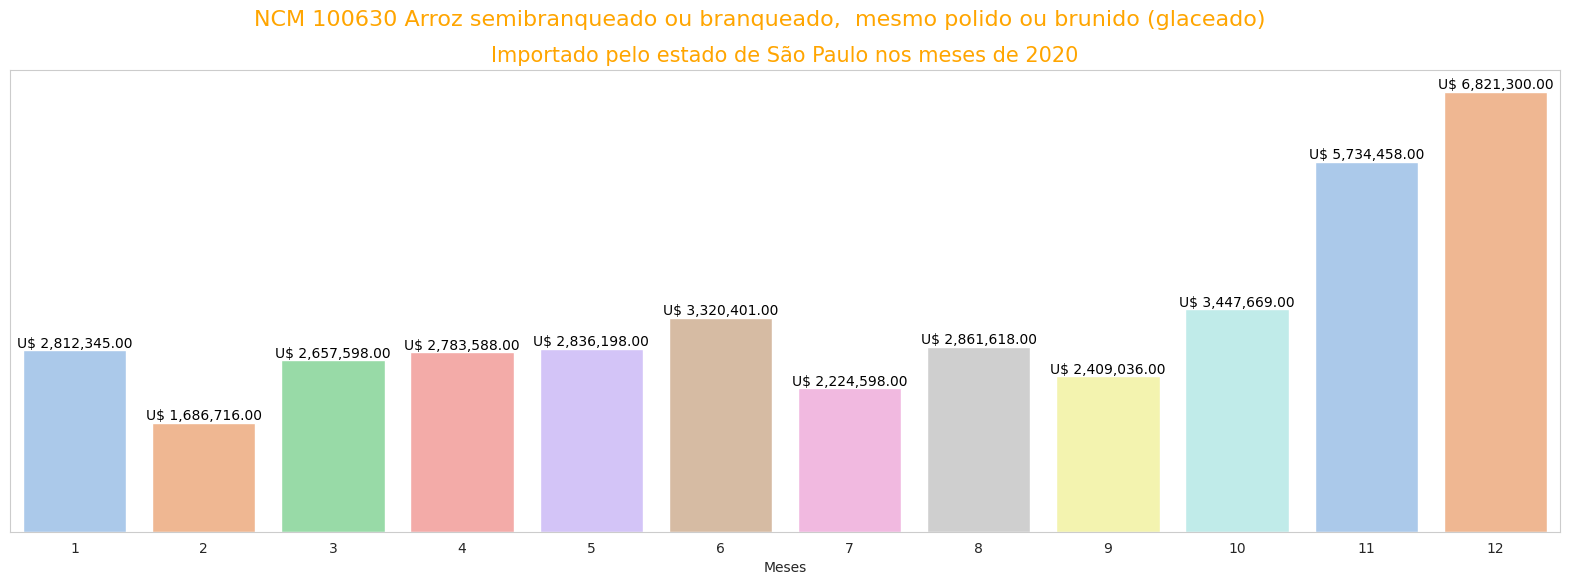

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # Esconder erros de saída
warnings.simplefilter('ignore', FutureWarning)

with sns.axes_style('whitegrid'):

    grafico = sns.barplot(data=ncm_100630, x='mes', y='total_fob', palette='pastel')

    grafico.set(xlabel='Meses', ylabel='')

    grafico.figure.set_size_inches(20,6)

    plt.title('Importado pelo estado de São Paulo nos meses de 2020', color='Orange', fontsize=15)
    plt.suptitle('NCM 100630 Arroz semibranqueado ou branqueado,  mesmo polido ou brunido (glaceado)', color='Orange', fontsize=16, x=0.5)
    plt.yticks([])

    for bar in grafico.patches:
        bar_height = bar.get_height()
        grafico.annotate(f'U$ {bar_height:,.2f}',
                     (bar.get_x() + bar.get_width() / 2, bar_height),
                     ha='center', va='center',
                     fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

print(f'Fonte: A partir do Download em `CSV`dos resultados da 1ª Consulta no Athena, renomeado para `Arroz NCM 100630 SP 2020.csv` presente na pasta `csv original consultas athena`') 

> **Nota:** O gráfico exibe os 12 meses de 2020, em que os meses 10,11 e 12 tiveram o maior `total_fob` sucessivamente em importações para o `NCM(100630)`, um dos fatores que pode ter influenciado essa constante foi o imposto zerado nesse período.
> 
> **Fonte:** [CNN_Brasil_Business](https://www.cnnbrasil.com.br/economia/macroeconomia/tarifa-zero-aumenta-importacao-mas-arroz-estrangeiro-esta-31-mais-caro/) com dados do `Ministério da Economia`.

<hr>

- **2ª Consulta**  

5 estados brasileiros que mais importaram no ano de 2020 ou número de vezes que importoram independente do `NCM`

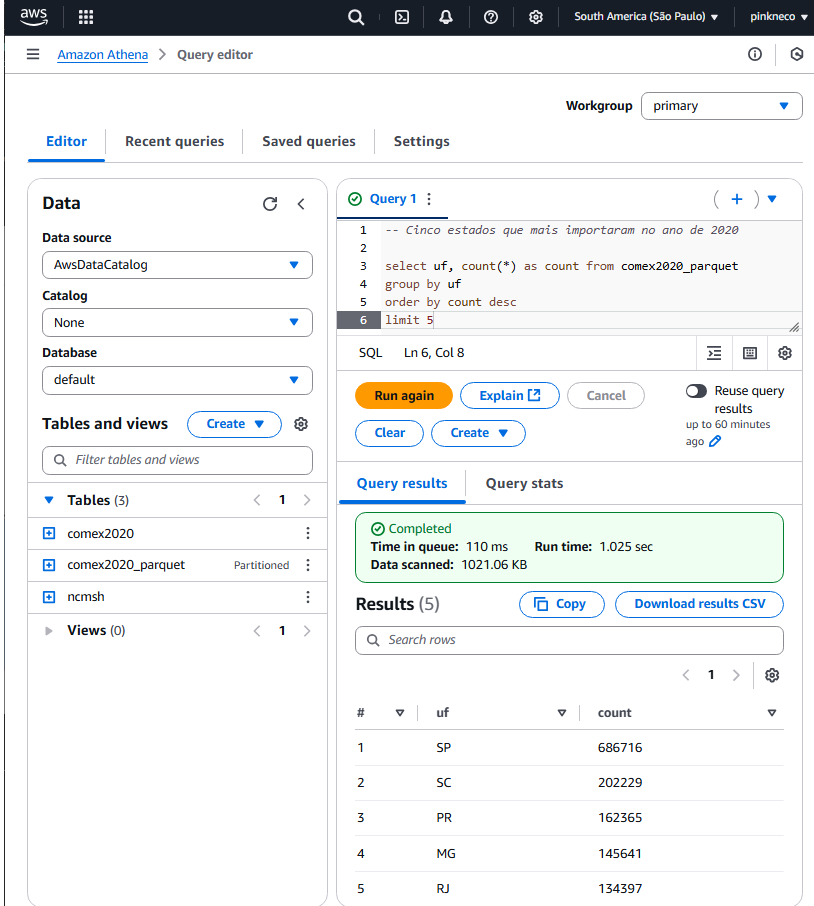

> **Nota:** Perceba nesta consuta que os dados escaneados somente na tabela `comex2020_parquet` foram de apenas 1021.06 KB 
>
> O estado de São Paulo foi o que mais importou no ano de 2020 com uma contagem de 686.716 vezes

<hr>

- **3ª Consulta** 

Quais os 5 produtos que o Paraná mais importou no ano de 2020?

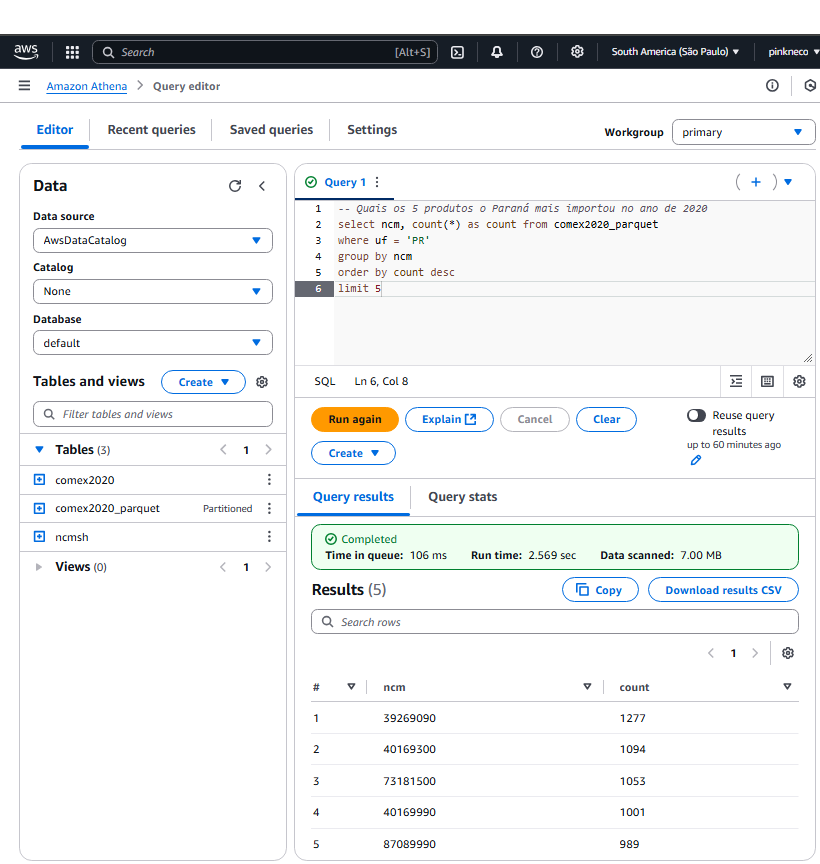

> **Nota:**
>
> - 39269090 Outras obras de plásticos
> - 40169300 Juntas, gaxetas e semelhantes, de borracha vulcanizada não endurecida
> - 73181500 Outros parafusos e pinos ou pernos, mesmo com as porcas e arruelas (anilhas) 
> - 40169990 Outras obras de borracha vulcanizada, não endurecida
> - 87089990 Outras partes e acessórios para tratores e veículos automóveis
>
> Como o estado do Paraná é um grande produtor de alimentos, os produtos mais importados são de outras categorias.
>
> **Os produtos importados estão mais relacionados com:**
> - plásticos e suas obras, 
> - borracha e suas obras, 
> - obras de ferro fundido ferro ou aço, 
> - veículos automóveis, tratores, ciclos e outros veículos terrestres, suas partes e acessórios
>
> Caso deseje saber mais detalhes sobre os `NCM's` consulte-os no site do [Siscomex](https://portalunico.siscomex.gov.br/classif/#/sumario?origem=menu&perfil=publico)






<hr>

- **4ª Consulta**

Total fob de importações por vias de transporte no ano de 2020

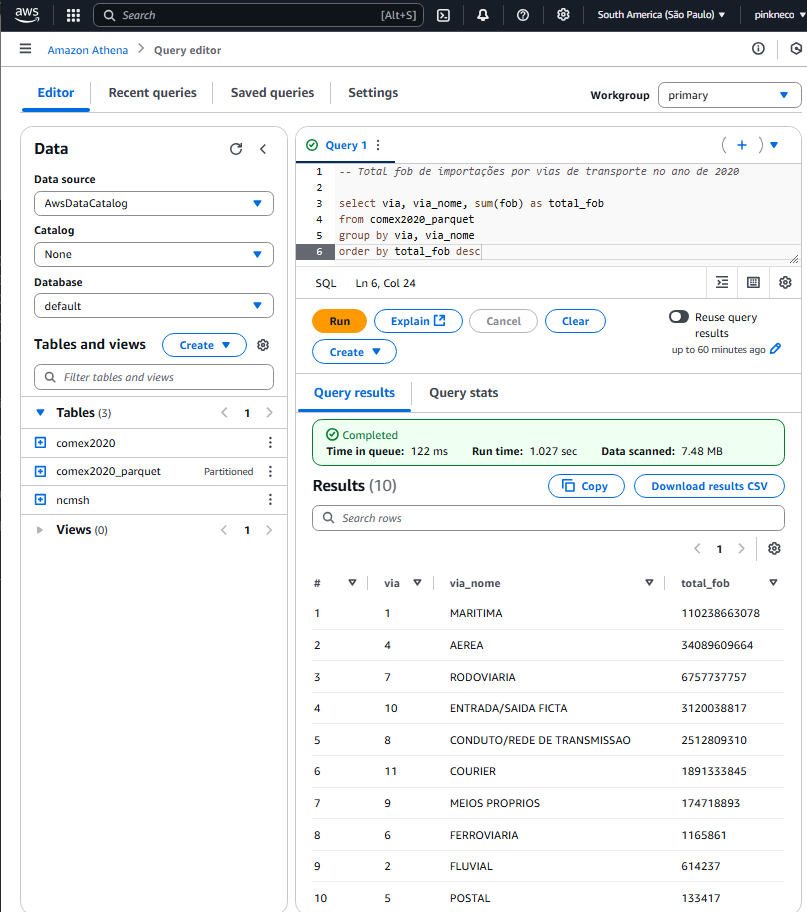

Evidentemente que a via marítima foi o meio de transporte que teve o maior `total_fob`, sendo que, o transporte marítimo é uma boa opção para transportar grandes volumes de cargas a custos relativamente baixos. Além disso, é uma das formas de transporte mais sustentáveis e seguras.


<hr>

- **5ª Consulta**

Ranking de 5 países que o Paraná mais importou em 2020

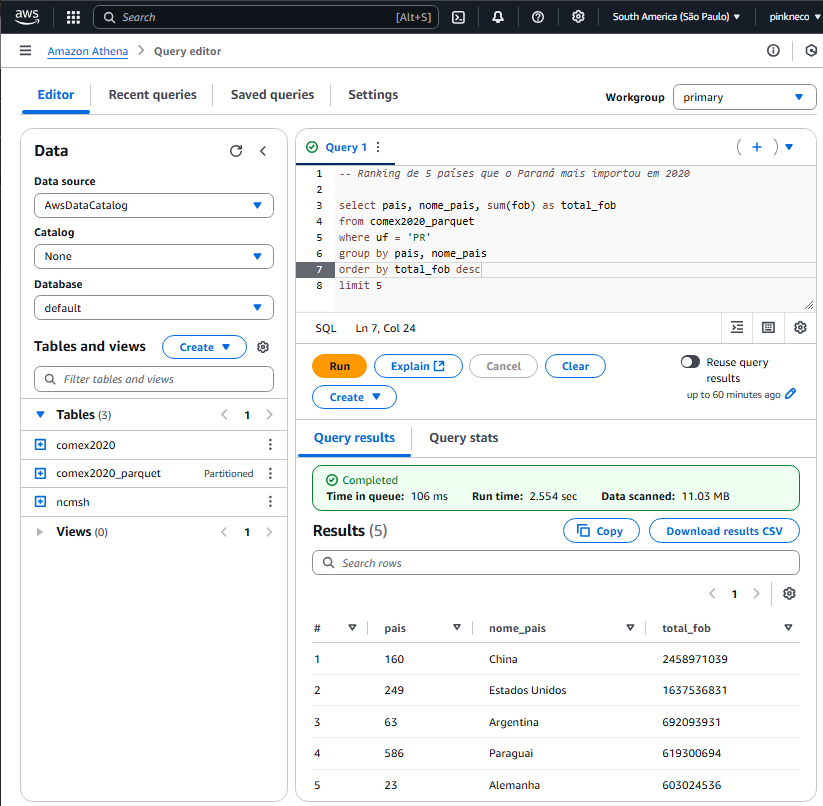

- **Gráfivo TreeMap do POWER BI**

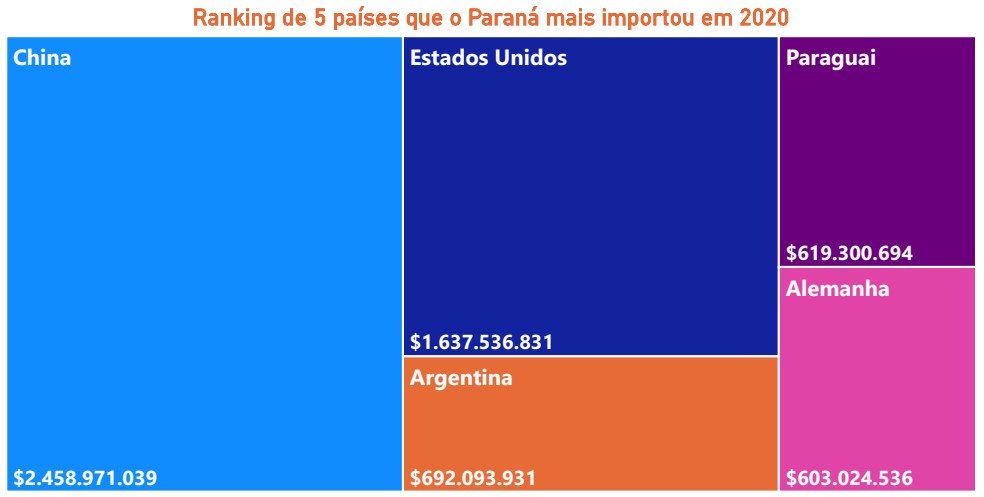

**Fonte:** A partir do Download em `CSV`dos resultados da 5ª Consulta no Athena, renomeado para `Ranking de 5 países que o Paraná mais importou em 2020.csv` presente na pasta `csv original consultas athena`

> **Nota:**
>
> Sebemos que a China e Estados Unidos são grandes potências e exportam muito para vários países, por isso estão do topo do ranking,
>
> já a Argentina em 3º lugar, seguida por Paraguai e Alemanha que possuem valores próximos de `total_fob` em importações no ano de 2020. 

<hr>

- **6ª Consulta em Python**

> **Aquisição de produtos farmacêuticos relacionados `NCM 3002 Subposição SH6`** 
> 
> Sangue humano; sangue animal preparado para usos terapêuticos, profiláticos ou de
> 
> diagnóstico; anti-soros, outras frações do sangue, produtos imunológicos modificados, 
>
> mesmo obtidos por via biotecnológica; vacinas, toxinas, culturas de microrganismos.
>
> **(*)Inclui Kits de teste para Covid-19, baseados em reações imunológicas**

In [37]:
ncm_sh4_3002 = df[(df['sh4'] == 3002) & (df['uf'] == 'PR') & (df['mes'] >= 1) & (df['mes'] <= 12)]  # Consulta de importações NCM 3002 do estado do Paraná no ano de 2020, 
                                                                                                    # a partir do 'Dataframe final enriquecido' criado na '1ª Etapa - ETL' desde projeto
                                                                                                    
ncm_sh4_3002 = ncm_sh4_3002.groupby(['mes']).agg({'fob':'sum'}).reset_index()                       # Agrupados por mês e somados os fob's por mês

ncm_sh4_3002.head(50).sort_values('mes', ascending=True)                                            # Ordenados por mês em ordem crescente

mes      fob
0     1  3019164
1     2  6584086
2     3  1688318
3     4  1248080
4     5  5190670
5     6  8775557
6     7  3040900
7     8  1054314
8     9  2554716
9    10  2226189
10   11  9384838
11   12  2750720

Fonte: A partir dos resultados da "6ª consulta em Python"


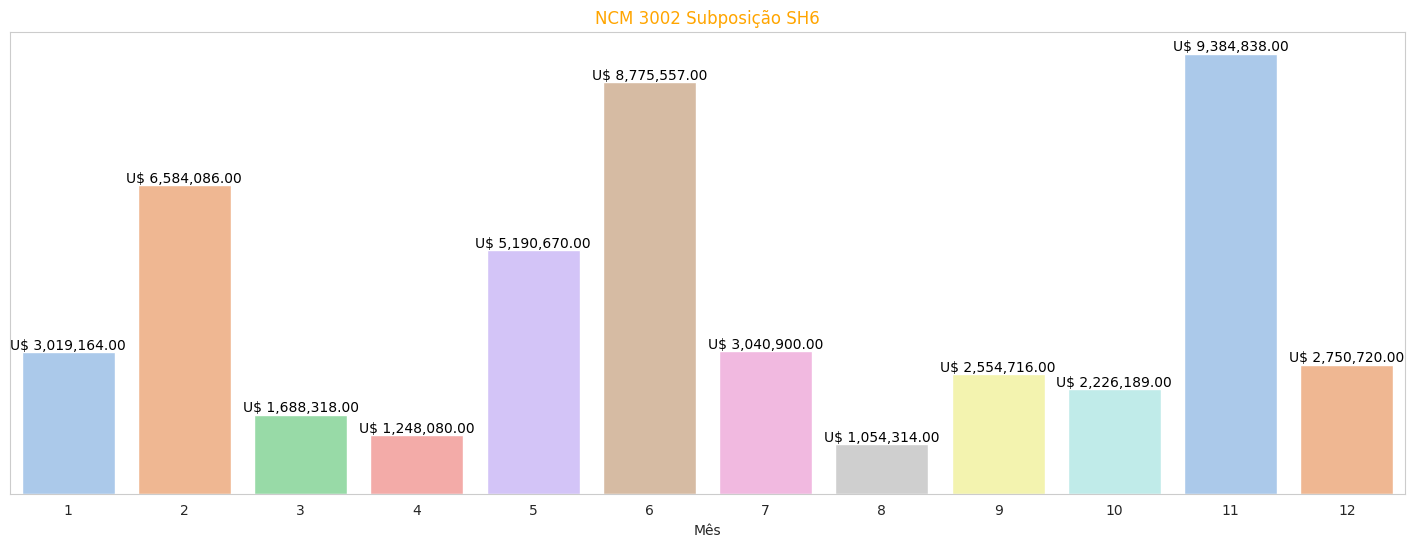

In [38]:
with sns.axes_style('whitegrid'):                                                                   # Gráfico de barras do Seaborn

    grafico = sns.barplot(data=ncm_sh4_3002, x='mes', y='fob', palette='pastel')

    grafico.set(xlabel='Mês', ylabel='')

    grafico.figure.set_size_inches(18,6)                                                            # Tamanho do gráfico
    
    plt.title("NCM 3002 Subposição SH6", color='orange')
    plt.yticks([]) 

  
    for bar in grafico.patches:                                                                     # Exibir os valores acima das barras
        bar_height = bar.get_height()
        grafico.annotate(f'U$ {bar_height:,.2f}',
                     (bar.get_x() + bar.get_width() / 2, bar_height),
                     ha='center', va='center',
                     fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

print(f'Fonte: A partir dos resultados da "6ª consulta em Python"')


> **Nota:** 
> 
> Os meses de `maio`, `junho` e `novembro` foram os meses em que o estado do Paraná
>
> teve as maiores compras relacionadas ao `NCM 3002 Subposição SH6` e que inclui kits de teste para COVID-19.

<hr>

- **7ª Consulta em Python**

Neste etapa do projeto iremos consultar dados de `casos confirmados` da `Covid-19` de março a dezembro de 2020 do estado do Paraná. Link dos dados no site [brasil.io](https://data.brasil.io/dataset/covid19/caso_full.csv.gz)

Por fim, iremos **comparar** as `compras` relacionadas ao `NCM 3002 Subposição SH6` de março a dezembro de 2020 com os `casos confirmados` da Covid em cada mês, para isso serão gerados dois gráficos em `Python` e dois em `Power BI`.

In [39]:
casos_full= pd.read_csv('csv original casos covid/caso_full.csv', sep=',')               # Arquivo csv original de casos confirmados da Covid-19

casos_full.head()

city  city_ibge_code        date  epidemiological_week  \
0  Rio Branco       1200401.0  2020-03-17                202012   
1         NaN            12.0  2020-03-17                202012   
2  Rio Branco       1200401.0  2020-03-18                202012   
3         NaN            12.0  2020-03-18                202012   
4  Rio Branco       1200401.0  2020-03-19                202012   

   estimated_population  estimated_population_2019  is_last  is_repeated  \
0              413418.0                   407319.0    False        False   
1              894470.0                   881935.0    False        False   
2              413418.0                   407319.0    False        False   
3              894470.0                   881935.0    False        False   
4              413418.0                   407319.0    False        False   

   last_available_confirmed  last_available_confirmed_per_100k_inhabitants  \
0                         3                                        0.72566   
1                         3                                        0.33539   
2                         3                                        0.72566   
3                         3                                        0.33539   
4                         4                                        0.96754   

  last_available_date  last_available_death_rate  last_available_deaths  \
0          2020-03-17                        0.0                      0   
1          2020-03-17                        0.0                      0   
2          2020-03-18                        0.0                      0   
3          2020-03-18                        0.0                      0   
4          2020-03-19                        0.0                      0   

   order_for_place place_type state  new_confirmed  new_deaths  
0                1       city    AC              3           0  
1                1      state    AC              3           0  
2                2       city    AC              0           0  
3                2      state    AC              0           0  
4                3       city    AC              1           0

In [40]:
casos_full.shape                                                # Quantidade de linhas e colunas do arquivo original

(3853648, 18)

In [41]:
casos_full.isna().sum()                                         # Verificar se possui valores nulos, 0 igual sem valor nulo, se maior que 0 deve ser tratado ou as linhas removidas

city                                             20119
city_ibge_code                                   13646
date                                                 0
epidemiological_week                                 0
estimated_population                             13646
estimated_population_2019                        13646
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    29166
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

In [42]:
casos_confirmados_sem_nulos = casos_full.dropna()               # Criar novo DataFrame e remover todas as linhas com valores nulos

casos_confirmados_sem_nulos.head()

city  city_ibge_code        date  epidemiological_week  \
0  Rio Branco       1200401.0  2020-03-17                202012   
2  Rio Branco       1200401.0  2020-03-18                202012   
4  Rio Branco       1200401.0  2020-03-19                202012   
6  Rio Branco       1200401.0  2020-03-20                202012   
8  Rio Branco       1200401.0  2020-03-21                202012   

   estimated_population  estimated_population_2019  is_last  is_repeated  \
0              413418.0                   407319.0    False        False   
2              413418.0                   407319.0    False        False   
4              413418.0                   407319.0    False        False   
6              413418.0                   407319.0    False        False   
8              413418.0                   407319.0    False        False   

   last_available_confirmed  last_available_confirmed_per_100k_inhabitants  \
0                         3                                        0.72566   
2                         3                                        0.72566   
4                         4                                        0.96754   
6                         7                                        1.69320   
8                        11                                        2.66075   

  last_available_date  last_available_death_rate  last_available_deaths  \
0          2020-03-17                        0.0                      0   
2          2020-03-18                        0.0                      0   
4          2020-03-19                        0.0                      0   
6          2020-03-20                        0.0                      0   
8          2020-03-21                        0.0                      0   

   order_for_place place_type state  new_confirmed  new_deaths  
0                1       city    AC              3           0  
2                2       city    AC              0           0  
4                3       city    AC              1           0  
6                4       city    AC              3           0  
8                5       city    AC              4           0

In [43]:
casos_confirmados_sem_nulos.shape                               # Quantidade de linhas e colunas após remoção dos valores nulos

(3804369, 18)

In [44]:
len(casos_full) - len(casos_confirmados_sem_nulos)              # Total de linhas removidas com valores nulos

49279

In [45]:
casos_confirmados_sem_nulos.isna().sum()                        # Confirmar se todos os valores nulos foram removidos, 0 igual sem valores nulos

city                                             0
city_ibge_code                                   0
date                                             0
epidemiological_week                             0
estimated_population                             0
estimated_population_2019                        0
is_last                                          0
is_repeated                                      0
last_available_confirmed                         0
last_available_confirmed_per_100k_inhabitants    0
last_available_date                              0
last_available_death_rate                        0
last_available_deaths                            0
order_for_place                                  0
place_type                                       0
state                                            0
new_confirmed                                    0
new_deaths                                       0
dtype: int64

In [46]:
casos_confirmados_sem_nulos.dtypes                              # Verificar os tipos das colunas

city                                              object
city_ibge_code                                   float64
date                                              object
epidemiological_week                               int64
estimated_population                             float64
estimated_population_2019                        float64
is_last                                             bool
is_repeated                                         bool
last_available_confirmed                           int64
last_available_confirmed_per_100k_inhabitants    float64
last_available_date                               object
last_available_death_rate                        float64
last_available_deaths                              int64
order_for_place                                    int64
place_type                                        object
state                                             object
new_confirmed                                      int64
new_deaths                     

In [47]:
import warnings                                                                                         # Ignorar erros de execução - Documentação no link: https://docs.python.org/pt-br/3.13/library/warnings.html

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)                       # Ignorar erros de execução

casos_confirmados_sem_nulos['date'] = casos_confirmados_sem_nulos['date'].astype('datetime64[ms]')      # Converter a coluna 'date' do DataFrame 'casos_confirmados_sem_nulos' do tipo 'object' para 'date' 

casos_confirmados = casos_confirmados_sem_nulos[['date','state','new_confirmed']]                       # Selecionar as colunas 'date','state','new_confirmed' em um novo Dataframe

casos_confirmados['mes'] = casos_confirmados['date'].dt.month                                           # Criar nova coluna mês com apenas o mês da coluna 'date' 

In [48]:
casos_confirmados.isna().sum()                                                                          # Confirmar se existem valores nulos após os tratamentos

date             0
state            0
new_confirmed    0
mes              0
dtype: int64

In [ ]:
casos_confirmados = casos_confirmados[(casos_confirmados['state'] == 'PR') & (casos_confirmados['date'] >= '2020-01-01') & (casos_confirmados['date'] <= '2020-12-31')] # Consulta de casos confirmados por estado e por período 

casos_confirmados = casos_confirmados.groupby(['mes']).agg({'new_confirmed':'sum'}).reset_index()       # Agrupar o resultado por 'mês' e somar a coluna 'fob'                                                

casos_confirmados.head(20).sort_values(by='mes', ascending=True)                                        # Ordenar pela coluna 'mês' em ordem crescente 

mes  new_confirmed
0    3            181
1    4           1231
2    5           3284
3    6          17943
4    7          52679
5    8          55201
6    9          46508
7   10          33493
8   11          66924
9   12         135988

In [50]:
casos_confirmados_e_ncm_sh4_3002 = pd.merge(casos_confirmados, ncm_sh4_3002, on='mes')                 # Criar novo DataFrame a partir da união dos DataFrames 'casos_confirmados e ncm_sh4_3002' pela coluna 'mês' com valores iguais, 
                                                                                                       # o 'mês' dos DataFrame 'casos_confirmados' inicia em março e une-se com o DataFrame 'ncm_sh4_3002' a partir de março 
casos_confirmados_e_ncm_sh4_3002.head(13)

mes  new_confirmed      fob
0    3            181  1688318
1    4           1231  1248080
2    5           3284  5190670
3    6          17943  8775557
4    7          52679  3040900
5    8          55201  1054314
6    9          46508  2554716
7   10          33493  2226189
8   11          66924  9384838
9   12         135988  2750720

In [51]:
casos_confirmados_e_ncm_sh4_3002.to_csv('csv original consultas pytnon/Casos confirmados covid-19 e compras NCM SH4 3002 - Paraná - 2020.csv', sep=',')                # Salvar em CSV para fazer um gráfico em POWER BI posteriormente

- **Agora é a etapa de comparação entre os dois gráficos**

- **Gráfico de barras de `casos confirmados` da Covid-19 no estado do Paraná no ano de 2020**

Compare este gráfico com o "Gráfico de barras de compras ncm_sh4_3002 do estado do Paraná no ano de 2020 - Inclui Kits Covid"


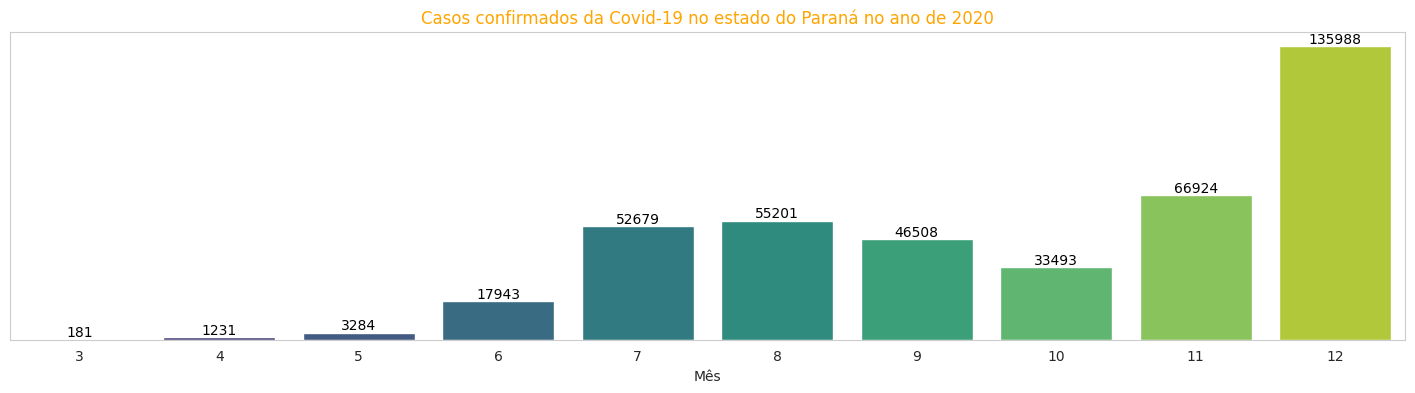

In [52]:
with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=casos_confirmados_e_ncm_sh4_3002, x='mes', y='new_confirmed', palette='viridis')
    grafico.figure.set_size_inches(18,4)
    grafico.set(xlabel='Mês', ylabel='')
    plt.title('Casos confirmados da Covid-19 no estado do Paraná no ano de 2020', color='orange')
    plt.yticks([])

    for bar in grafico.patches:
        bar_height = bar.get_height()
        grafico.annotate(f'{bar_height:.0f}',
                     (bar.get_x() + bar.get_width() / 2, bar_height),
                     ha='center', va='center',
                     fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

print(f'Compare este gráfico com o "Gráfico de barras de compras ncm_sh4_3002 do estado do Paraná no ano de 2020 - Inclui Kits Covid"')

- **Gráfico de barras de compras `ncm_sh4_3002` do estado do Paraná no ano de 2020 - Inclui Kits Covid**

Compare este gráfico com o "Gráfico de barras de `casos confirmados` da Covid-19 no estado do Paraná no ano de 2020"


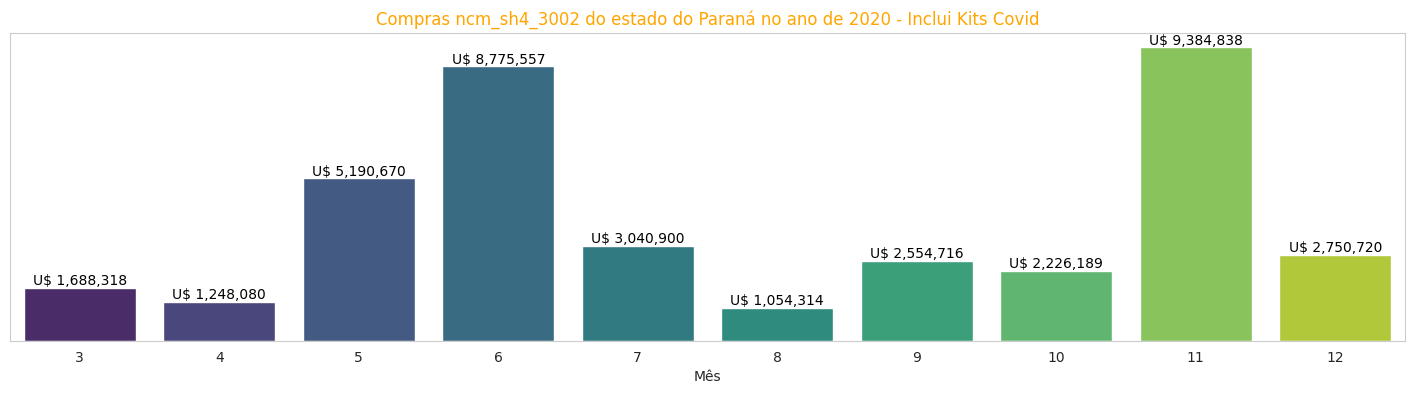

In [53]:
with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=casos_confirmados_e_ncm_sh4_3002, x='mes', y='fob', palette='viridis')
    grafico.figure.set_size_inches(18,4)
    grafico.set(xlabel='Mês', ylabel='')
    plt.title('Compras ncm_sh4_3002 do estado do Paraná no ano de 2020 - Inclui Kits Covid', color='orange')
    plt.yticks([])

    for bar in grafico.patches:
        bar_height = bar.get_height()
        grafico.annotate(f'U$ {bar_height:,.0f}',
                     (bar.get_x() + bar.get_width() / 2, bar_height),
                     ha='center', va='center',
                     fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

print(f'Compare este gráfico com o "Gráfico de barras de `casos confirmados` da Covid-19 no estado do Paraná no ano de 2020"')

- **Analises entre os gráficos de `Casos confirmados` e `Compras NCM_sh4_3002`**

> **Notas:**
>
> Os casos da Covid-19 começaram a crescer no ano de 2020, no mês de março surgem os primeiros casos confirmados, com isso, no mesmo mês as compras que incluem vacinas e kits de teste para Covid também crescem; 
> 
> No mês de abril os casos aumentam um pouco mais, porém as compras foram menores em relação ao mês de março;
> 
>Em maio os casos confirmados quase triplicaram, então as compras aumentaram no mesmo mês em 315,89%;
> 
> Em junho, os casos que eram de 3284 em maio, passam para 17.943 casos, com isso as compras também aumentam em 69,06%;
> 
> No mês de julho os casos aumentam novamente, no entanto, as compras são menores, possivelmente por já haver estoques da compra anterior que foi significativa, entre outros fatores;
> 
> No mês de agosto os casos crescem mais um pouco e as compras são menores ainda, talvez pelos mesmos fatores da última compra;
> 
> Em setembro os casos diminuem um pouco, mas as compras crescem um pouco novamente, talvez pelos estoques serem menores;
> 
> No mês de outubro os casos diminuem ainda mais em relação ao mês anterior e novamente as compras são menores;
> 
> Em novembro os casos aumentam em relação há todos os meses anteriores, com isso, as compras são as maiores entre todos os meses; 
> 
> Em dezembro os casos confirmados tem o maior aumento do ano de 2020, e as compras são menores, pois em novembro ouve uma compra expressiva, possivelmente os estoques eram positivos. 


- **Gráficos em POWER BI de `Casos confirmados` e `Compras NCM_sh4_3002`**                      

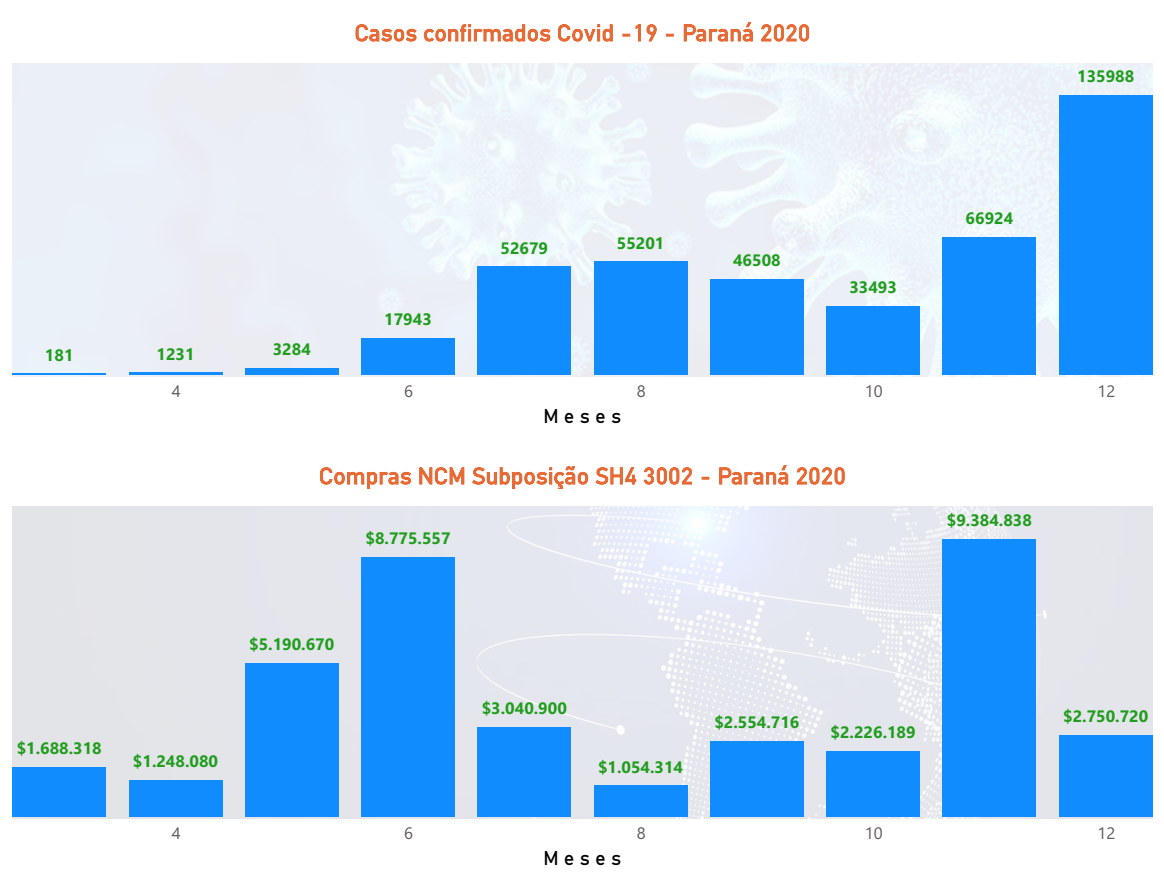

Fonte: `Casos confirmados covid-19 e compras NCM SH4 3002 - Paraná - 2020.csv` presente na pasta `csv original consultas pytnon`

> **Nota:** A escolha do método de criação dos gráficos se `Power Bi`, se `Python`, ambos ou outros meios fica a critério...

<hr>

- **8ª Consulta em Python**

- **Comparação das médias por mês das cotações do ano 2020 com as médias das compras por mês do ano de 2020**

Link do arquivo `CSV` no Banco Central do Brasil [BCB](https://www.bcb.gov.br/estabilidadefinanceira/historicocotacoes).  

É necessário fazer o Download em dois `CSV's`, um de `janeiro` a `junho` de 2020 e um de `julho` a `dezembro` de 2020. 

`1º` arquivo, especificar as datas de 01/01/2020 a 30/06/2020 e `2º`arquivo de 01/07/2020 a 31/12/2020 no site do BCB.

No momento do Download dos arquivos, o 1º foi renomeado para `cotacao-1a6de2020.csv` e o 2º para `cotacao-7a12de2020.csv`, posteriomente esses arquivos serão unidos um abaixo do outro em um `DataFrame`.

In [54]:
import pandas as pd

In [55]:
cotacao1a6de2020 = pd.read_csv('csv original cotacao bcb/cotacao-1a6de2020.csv', sep=';')                                    # Para este arquivo específico e sem cabeçalho, o pandas usa a 1ª linha como cabeçalho,   
                                                                                                                             # e removeu os zeros a esquerda das datas que começam com 0, é necessário corrigir isso...
cotacao1a6de2020.head(2)       

02012020  220  A  USD  4,0207  4,0213  1,0000 1,0000.1
0   3012020  220  A  USD  4,0516  4,0522  1,0000   1,0000
1   6012020  220  A  USD  4,0548  4,0554  1,0000   1,0000

In [56]:
cotacao7a12de2020 = pd.read_csv('csv original cotacao bcb/cotacao-7a12de2020.csv', sep=';')                                  # Para este arquivo específico e sem cabeçalho, o pandas usa a 1ª linha como cabeçalho,   
                                                                                                                             # e removeu os zeros a esquerda das datas que começam com 0, é necessário corrigir isso...
cotacao7a12de2020.head(2)

01072020  220  A  USD  5,3646  5,3651  1,0000 1,0000.1
0   2072020  220  A  USD  5,3022  5,3028  1,0000   1,0000
1   3072020  220  A  USD  5,3368  5,3374  1,0000   1,0000

In [57]:
cotacao1a6de2020 = pd.read_csv('csv original cotacao bcb/cotacao-1a6de2020.csv', sep=';', header=None,  dtype=str)           # Corrigir o cabeçalho com 'header=None' e recolocar os zeros a esquerda com 'dtype=str'
cotacao1a6de2020.head(2)

0    1  2    3       4       5       6       7
0  02012020  220  A  USD  4,0207  4,0213  1,0000  1,0000
1  03012020  220  A  USD  4,0516  4,0522  1,0000  1,0000

In [58]:
cotacao7a12de2020 = pd.read_csv('csv original cotacao bcb/cotacao-7a12de2020.csv', sep=';', header=None,  dtype=str)         # Corrigir o cabeçalho com 'header=None' e recolocar os zeros a esquerda com 'dtype=str'
cotacao7a12de2020.head(2)

0    1  2    3       4       5       6       7
0  01072020  220  A  USD  5,3646  5,3651  1,0000  1,0000
1  02072020  220  A  USD  5,3022  5,3028  1,0000  1,0000

In [59]:
from datetime import datetime

cotacao1a12de2020 = pd.concat([cotacao1a6de2020, cotacao7a12de2020], ignore_index=True)                                     # Unir os Dataframes

cotacao1a12de2020[0] = pd.to_datetime(cotacao1a12de2020[0], format='%d%m%Y')                                                # Conveter a coluna 0 do DataFrame 'cotacao1a12de2020' para o formato ´datetime´

cotacao1a12de2020 = cotacao1a12de2020[[0,4]].rename(columns={0:'data',4:'cotacao'})                                         # Selecionar a coluna '0' e renomear para 'data' e '4' e renomear para 'cotacao'

cotacao1a12de2020['cotacao'] = cotacao1a12de2020['cotacao'].str.replace(',', '.').astype(float)                             # Substituir a 'vírgula' da cotaçao por 'ponto' para permitir o cálculo da média posteriormente

cotacao1a12de2020.head(2)

data  cotacao
0 2020-01-02   4.0207
1 2020-01-03   4.0516

In [60]:
cotacao1a12de2020.set_index('data', inplace=True)                                                                           # Usar a coluna data como índice, no momento de fazer a média das cotações
                                                                                                                            # por mês os índices são agrupados por mês e tem-se a média daquele mês. Complexo não!?  

In [61]:
media_mensal = cotacao1a12de2020['cotacao'].resample('ME').mean()                                                           # Calcular a média das cotações para cada mês

media_mensal_cotacao1a12de2020 = media_mensal.to_frame(name='Média da Cotação').reset_index()                               # Renomear a coluna 'cotacao' para 'Média da Cotação' e converter   
                                                                                                                            # o resultado do cálculo da média para um DataFrame, pois no cálculo da média ficou com uma série pandas
                                                                                                                            
media_mensal_cotacao1a12de2020['mes'] = media_mensal_cotacao1a12de2020['data'].dt.month                                     # Cria nova coluna 'mes' a partir da coluna 'data'

media_mensal_cotacao1a12de2020 = media_mensal_cotacao1a12de2020[['mes','Média da Cotação']]                                 # Selecionar de forma direta apenas a nova coluna 'mes' e 'Média da Cotação'

media_mensal_cotacao1a12de2020['Média da Cotação'] = media_mensal_cotacao1a12de2020['Média da Cotação'].round(2)            # Arredondar o valor das médias para dois números após o ponto 

media_mensal_cotacao1a12de2020.head(12)

mes  Média da Cotação
0     1              4.15
1     2              4.34
2     3              4.88
3     4              5.32
4     5              5.64
5     6              5.20
6     7              5.28
7     8              5.46
8     9              5.40
9    10              5.63
10   11              5.42
11   12              5.14

- **Gráfico de linha da `media_mensal_cotacao1a12de2020`**

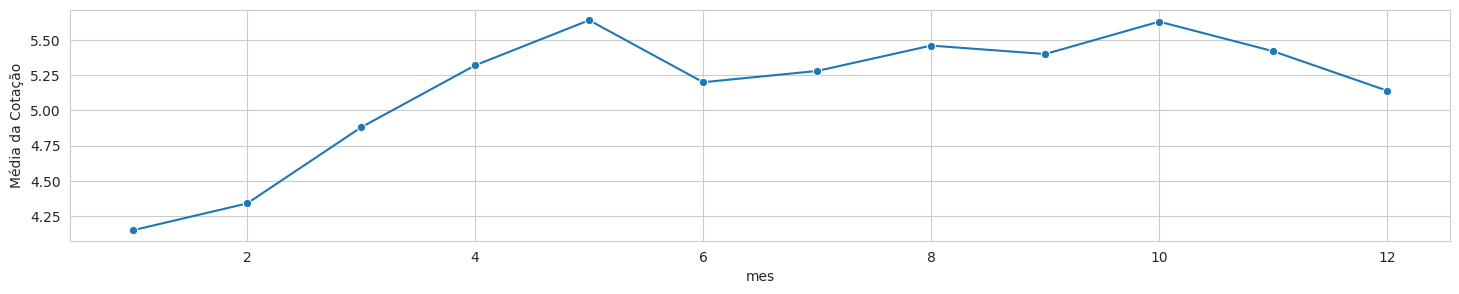

In [62]:
with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=media_mensal_cotacao1a12de2020, x='mes', y='Média da Cotação', marker='o')

    grafico.figure.set_size_inches(17.8,3)   

- **Consulta geral de importações por mês no ano de 2020**

In [63]:
compras_2020 = df[(df['mes'] >= 1) & (df['mes'] <= 12)]                                                                  # Consulta geral de importações por mês no ano de 2020 a 
                                                                                                                         # partir do 'Dataframe final enriquecido' criado na '1ª Etapa - ETL' desde projeto
                                                                                                                             
compras_2020 = compras_2020.groupby(['mes']).agg({'fob':'mean'}).reset_index()                                           # Agrupar por mês e calcular a média dos fob's por mês

compras_2020.head(12).sort_values('mes', ascending=True)                                                                 # Ordenados por mês em ordem crescente

mes            fob
0     1  105505.152383
1     2   92670.078615
2     3   90385.093016
3     4   87710.295833
4     5   83597.692427
5     6   83619.805323
6     7   82933.905552
7     8   79765.908868
8     9   86160.227703
9    10   84199.278852
10   11   90246.089987
11   12   97024.854721

- **Gráfico de linha `compras_2020`**

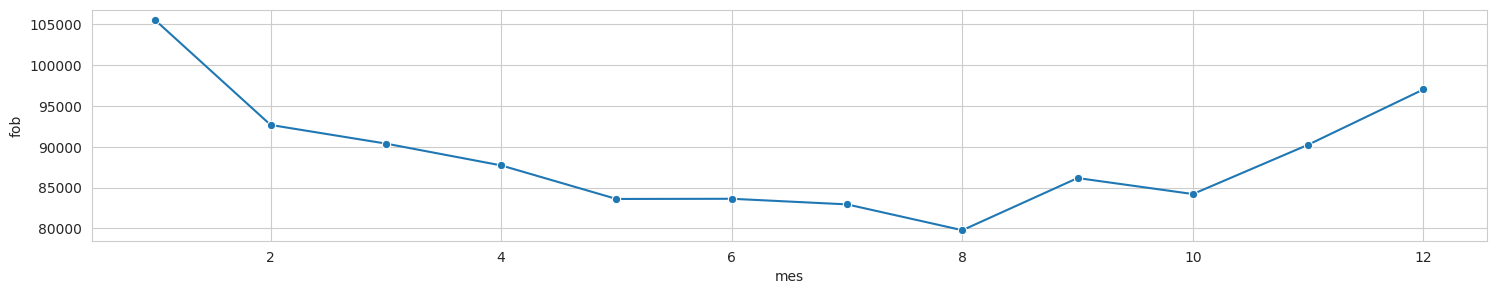

In [64]:
with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(data=compras_2020, x='mes', y='fob', marker='o')

    grafico.figure.set_size_inches(18,3)   

> **Nota:**
>
> Comparando os dois gráficos confirma-se que quando a `média da cotação` em um mês é `baixa`, a `média de compras` é `alta` no mesmo mês e vice-versa.

- **`Correlação de Pearson` entre os Dataframes `media_mensal_cotacao1a12de2020` e `compras_2020`**

O Coeficiente de correlação de Pearson (r) é uma medida adimensional que pode assumir valores no intervalo entre -1 e +1. 

O coeficiente mede a intensidade e a direção de relações lineares. A intensidade diz respeito ao grau de relacionamento entre duas variáveis.

Para saber mais acesse: [Coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)

<Axes: >

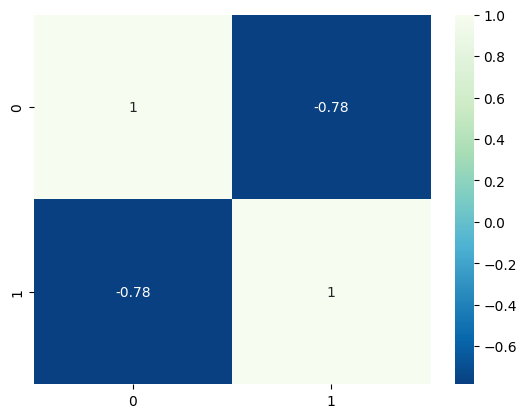

In [65]:
import numpy as np

corrcoef_comercial = np.corrcoef(media_mensal_cotacao1a12de2020['Média da Cotação'], compras_2020['fob'])

sns.heatmap(corrcoef_comercial, annot=True, cmap='GnBu_r')

> **Nota:** 
>
> Isso indica uma correlação negativa quase que perfeita se fosse mais próxima de -1. 
>
> Neste caso a `Correlação de Pearson: -0.78` entre as `médias das cotações mensais` e as `médias das compras mensais` é válida, ou seja, nota-se nos gráficos que quando a média de cotações mensais aumenta, a média de compras mensais diminui e vice-versa.

<hr>

<h1 id='conclusao'><b>Conclusão</b> <button style="background-color:rgb(4, 66, 6); padding: 1px 5px; border: none; border-radius: 5px;"><a style="font-size: 15px; color: white;" href="#menu"><b>Voltar ao menu</b></a></button></h1>

<div style="text-align: justify; width: 80%; background-color:; line-height: 1.8; font-size: 18px">

<div align="justify">

<h3>Quanto aos dados:</h3>

Conhecer os dados, como estão estruturados e como devem ser estruturados é de suma importância no momento de desenvolver projetos de analises de dados, seja para aplicações off-line ou online, entre outras.

Grande parte de um projeto de analise de dados esta em `ETL` (extrair, transformar e carregar), ou seja, arrumar as coisas conforme as necessidades para permitir a geração assertiva de resultados e insights relevantes para as tomadas de decisões.

Este foi um projeto simples de analise de dados, mas que exigiu alguns esforços e conhecimentos. As possibilidades de se chegar aos mesmos ou melhores resultados deste projeto são inúmeras por meio de outras ferramentas e linguagens de programação, contudo, fica a critério de cada interessado realizá-lo conforme eventual necessidade. 

<h3>Quanto às importações:</h3>

É muito interessante conhecer como as importações evoluem ao longo do tempo em volume, em valor e outras variáveis muito importantes, isso ajuda a entender a economia de um país e as relações internacionais. 

O comércio exterior ou Comex é uma área complexa e que esta em constante evolução, principalmente no que diz respeito à tecnologia, envolve questões tributárias, financeiras, administrativas, comerciais e aduaneiras. 

Sendo assim, saber detalhadamente como tudo ocorre é primordial nesse mundo, pois, dados ou informações erradas podem gerar grandes prejuízos.
 

</div>

<hr>

<h1 align='center'>Obrigado</h1>

<footer>
  <div class="footer-content">
    <p>Sandro - Data Analyst</p>
    <p>&copy; 2025 - All rights reserved.</p>
    <p>Contact me: <a href="mailto:pinkneco@hotmail.com">pinkneco@hotmail.com</a></p>
  </div>
  <div class="social-media">
    <a href="https://www.linkedin.com/in/sandro-alexandre-olmedo/" target="_blank">LinkedIn</a>
    <br>
    <a href="https://github.com/Sandro-Alexandre-Olmedo" target="_blank">GitHub</a>
    <br>
    <a href="https://www.kaggle.com/sandroalexandre" target="_blank">Kaggle</a>
    </div>
</footer>


 <button style="background-color:rgb(4, 66, 6); padding: 1px 5px; border: none; border-radius: 5px;"><a style="font-size: 15px; color: white;" href="#menu"><b>Voltar ao menu</b></a></button></h1>

<hr>